In [13]:
from numpy import linalg as LA
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import circle_fit as cf
import numpy as np
import cv2
import os

## 目前進度
### 還須找到更好的擬合公式
### 或是找到適合 sample 的距離 

## 縮寫頓應
pt   -> points  <br>
dist -> distance <br>
spl  -> sample


## Get subpixel edge locations

In [14]:
def sigmoid(x, a, b):
    return 1.0 / (1.0 + np.exp(-a*(x-b)))

In [15]:
def get_sample_value(coord, img):
    center = np.around(coord)
    
    x, y = int(center[0]), int(center[1])
    neighbor_val = []
    neighbor_dist = []
    
    ## 取的9格的距離跟值
    for i in range(-1,2):
        for j in range(-1,2):
            dist = LA.norm((center + np.asarray([j,i])) - coord)
            neighbor_val.append(img[y+i, x+j])
            neighbor_dist.append(dist)

    ## 依照距離反比給權重
    neighbor_dist = np.asarray(neighbor_dist)/np.sum(neighbor_dist)
    neighbor_dist = (1 - np.asarray(neighbor_dist))/8
    
    value = np.dot(neighbor_val, neighbor_dist)
    return value


In [48]:
def get_subpixel_edge(center, edge_pts, img):
    sp_edge = []
    
    for pt in edge_pts:
        ## 取得中心到邊緣的單位向量
        c2e_Vector = pt - center
        c2e_Vector = c2e_Vector/LA.norm(c2e_Vector)
        
        
        spl_pts = []
        spl_vals = []
        for i in range(-10, 11):
            ## 生出要擬合 S 曲線的點
            spl_loc = pt + i*c2e_Vector
            spl_val = get_sample_value(spl_loc, img)
            
            spl_pts.append(spl_loc)
            spl_vals.append(spl_val)
            

#         print(spl_pts)
#         print(spl_vals)
        
        x_label = np.asarray(range(0,21))
        

        ## 擬合 S 曲線
        popt, pcov = curve_fit(sigmoid, x_label, spl_vals)
        print(popt)
        
        x = np.linspace(-5, 35, 50)
        y = sigmoid(x, *popt)

        plt.plot(x_label, spl_vals, 'o', label='data')
#         plt.plot(x,y, label='fit')
        plt.ylim(100, 140)
        plt.legend(loc='best')
        plt.show()
        
#         break
    
    return sp_edge

In [49]:
def image_processing(gray_img):
    blur = cv2.GaussianBlur(gray_img, (5,5), 0)
    nlm  = cv2.fastNlMeansDenoising(blur, None, 10, 7, 21)
    _, otsu = cv2.threshold(nlm, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    edge = cv2.Canny(otsu, 0, 20)
    
    return blur, nlm, otsu, edge

def get_edge_points(edge_img):
    edge_points = [[j,i] for i, r in enumerate(edge_img) for j, c in enumerate(r) if c == 255]

    return edge_points

[  72.76459507 -122.40073219]


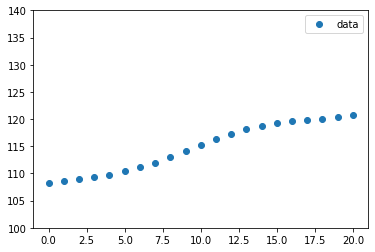

[  72.77523465 -122.39306332]


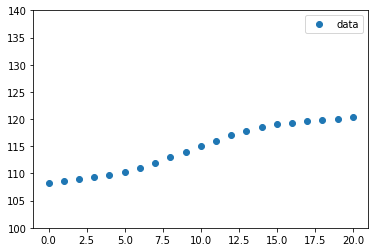

[  72.78450777 -122.38583128]


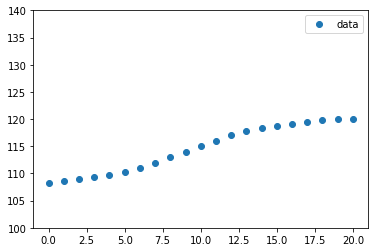

[  72.8296334  -122.35416701]


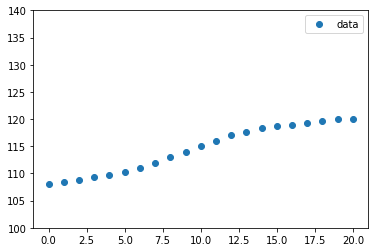

[  72.82871178 -122.35481143]


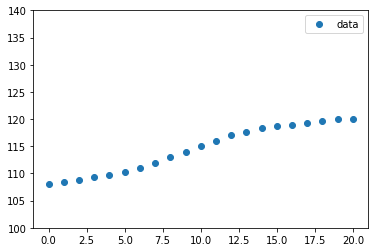

[  72.78332948 -122.38665522]


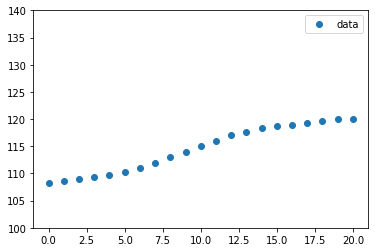

[  72.74006011 -122.41699383]


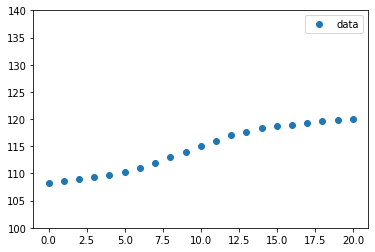

[  72.73150907 -122.42268503]


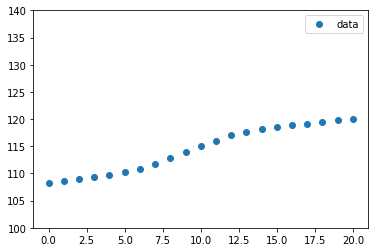

[  72.72127795 -122.42949371]


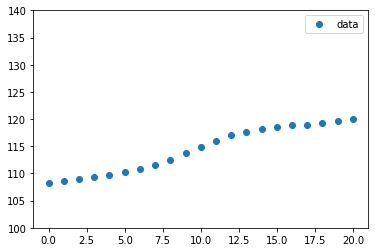

[  72.71255197 -122.43529992]


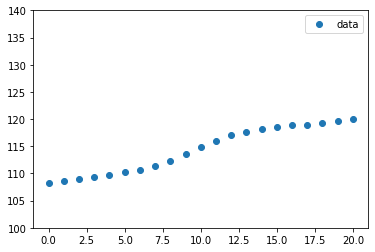

[  72.72099843 -122.42968542]


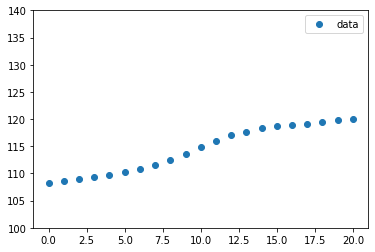

[  72.73118439 -122.42291297]


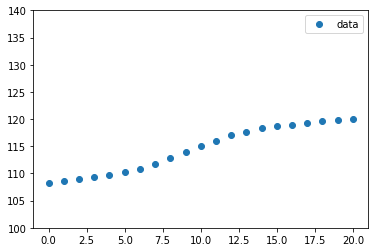

[  72.73971557 -122.41724554]


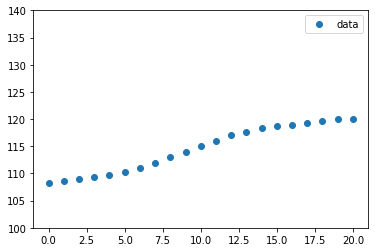

[  72.74024703 -122.41689645]


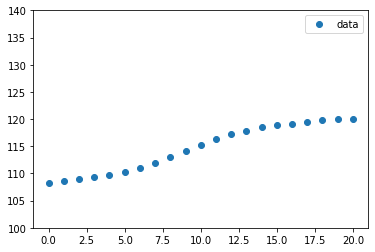

[  72.74127939 -122.416218  ]


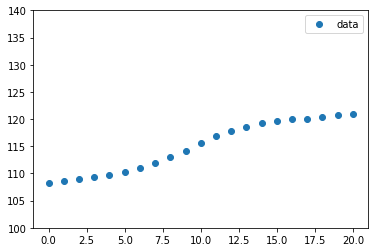

[  72.74046049 -122.41675885]


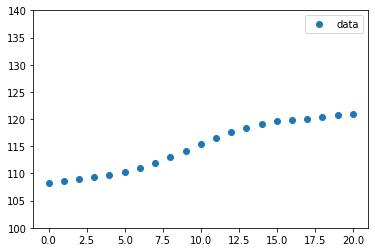

[  72.78070477 -122.38841589]


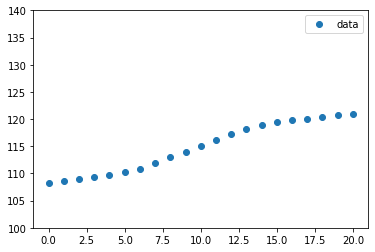

[  72.78226844 -122.38553452]


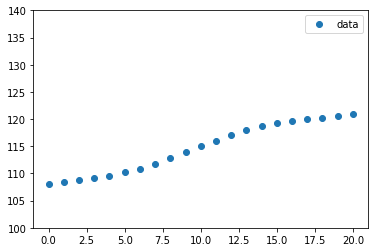

[  72.77978431 -122.38543515]


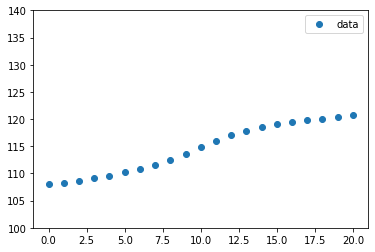

[  72.72831252 -122.41948396]


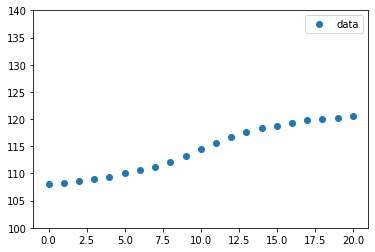

[  72.69699725 -122.44024571]


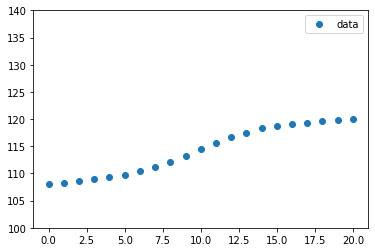

[  72.71719171 -122.42683725]


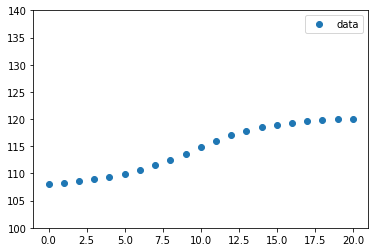

[  72.73583095 -122.41445942]


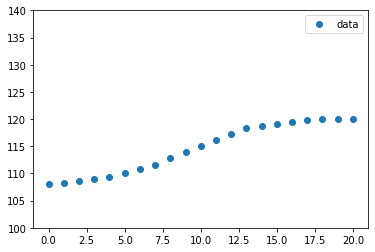

[  72.62948865 -122.49153647]


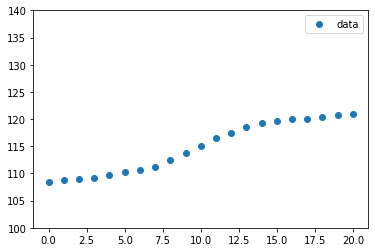

[  72.68724104 -122.45041314]


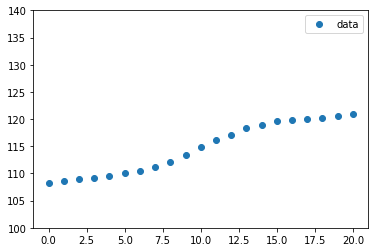

[  72.6871576  -122.44895814]


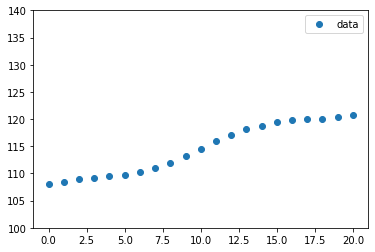

[  72.69180413 -122.44406055]


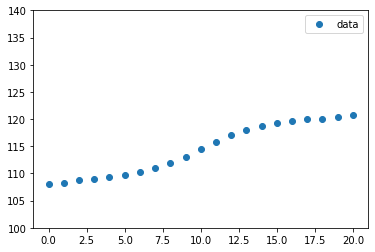

[  72.67444342 -122.44986139]


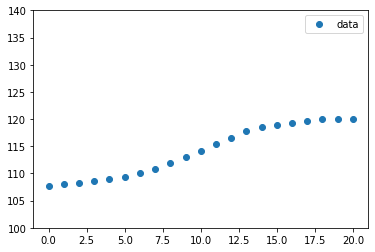

[  72.70240738 -122.43135463]


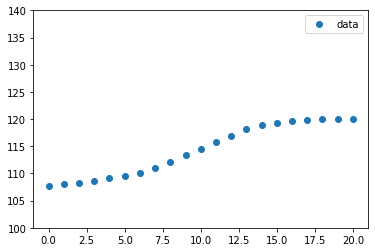

[  72.69536931 -122.43663143]


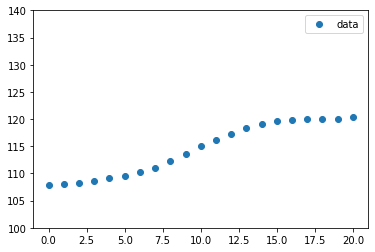

[  72.68748037 -122.44249284]


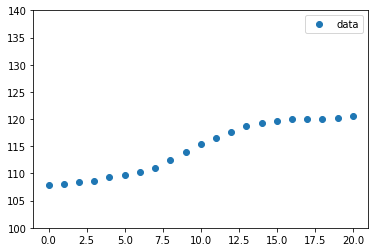

[  72.60251973 -122.51002818]


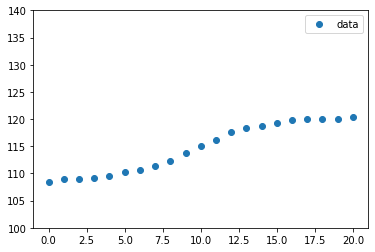

[  72.57032904 -122.53054017]


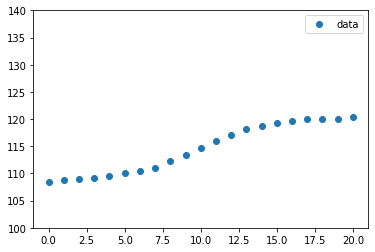

[  72.60687157 -122.50336553]


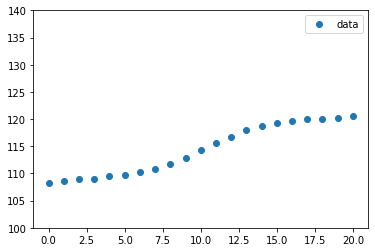

[  72.52010986 -122.55034939]


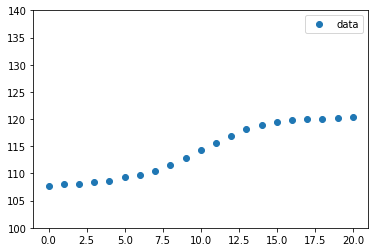

[  72.52952925 -122.54411857]


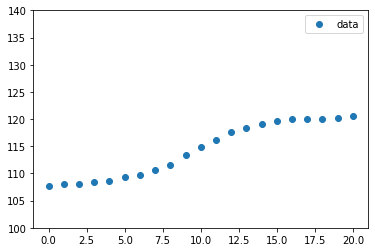

[  72.54164968 -122.53609643]


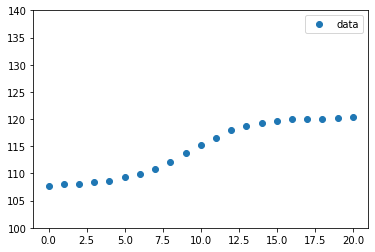

[  72.61461662 -122.50143257]


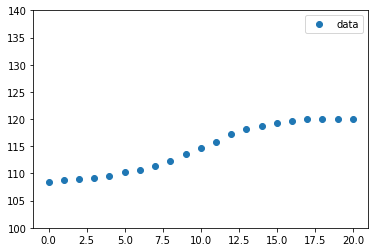

[  72.65647852 -122.47107044]


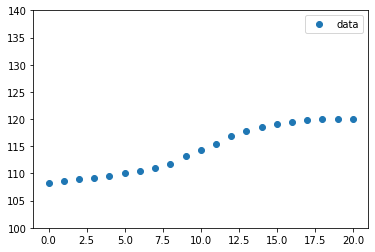

[  72.54718989 -122.52818302]


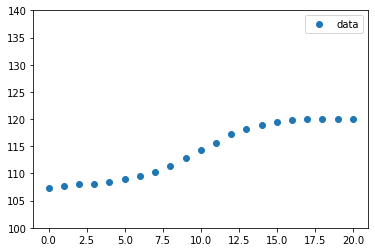

[  72.59930007 -122.49388775]


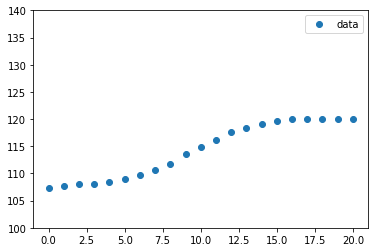

[  72.52015498 -122.56786685]


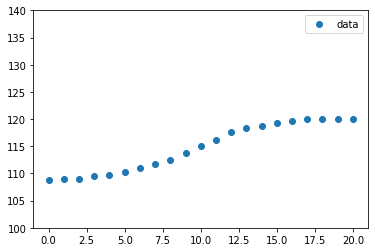

[  72.49130955 -122.5847734 ]


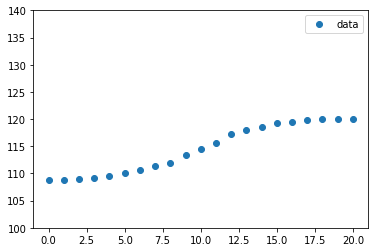

[  72.6403615  -122.48174857]


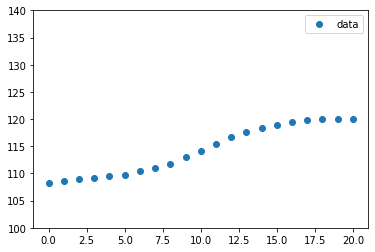

[  72.54070764 -122.52921445]


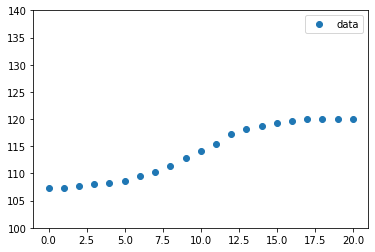

[  72.54008972 -122.53147594]


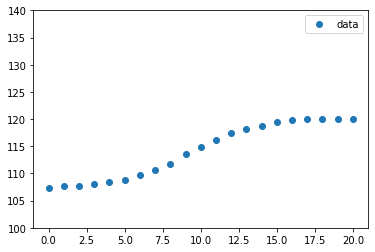

[  72.59964952 -122.49318309]


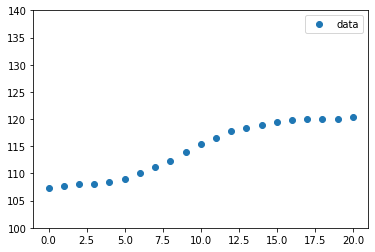

[  72.65697569 -122.48098144]


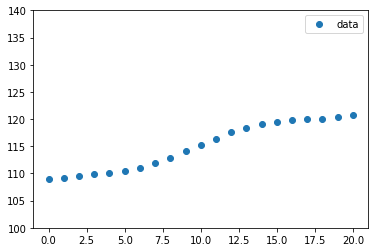

[  72.61375998 -122.50841046]


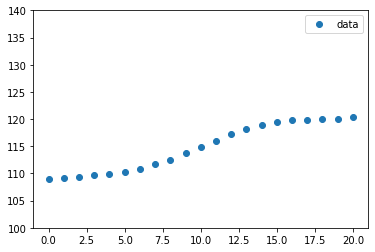

[  72.52661834 -122.56347035]


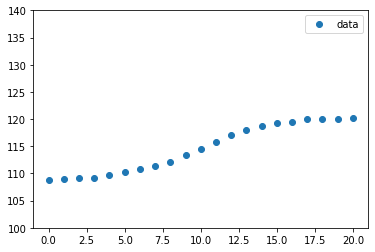

[  72.53430145 -122.5567279 ]


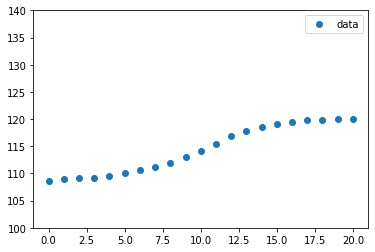

[  72.57067958 -122.50695775]


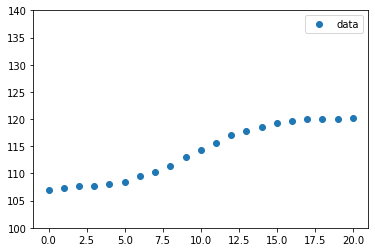

[  72.68440225 -122.43228993]


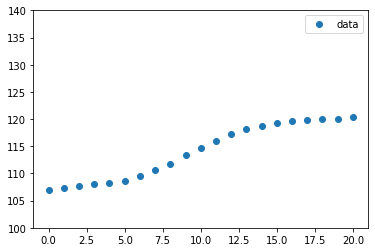

[  72.75304742 -122.38695383]


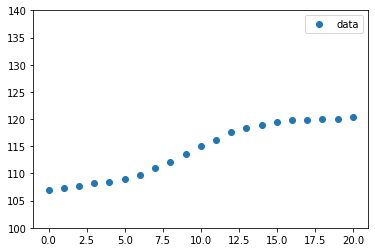

[  72.86742615 -122.31133403]


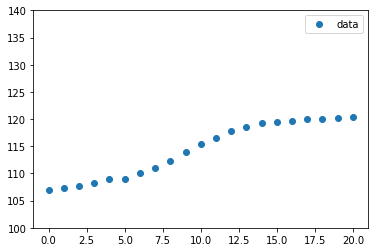

[  72.67002345 -122.47272147]


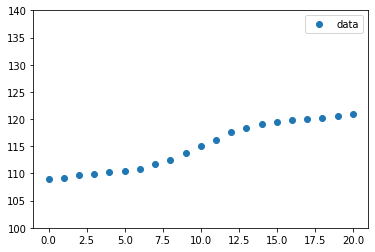

[  72.60932936 -122.51147383]


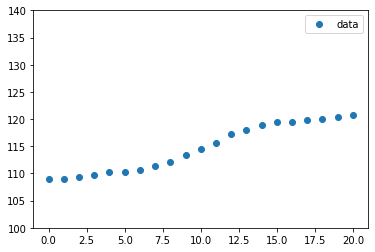

[  72.60873808 -122.47934686]


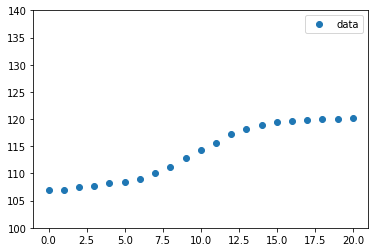

[  72.67788493 -122.43439282]


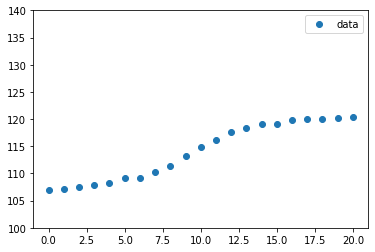

[  72.69042094 -122.45963735]


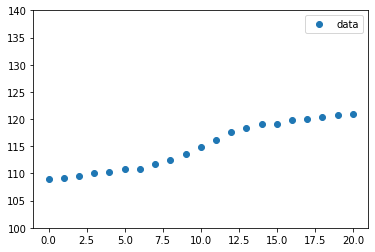

[  72.61202118 -122.51010664]


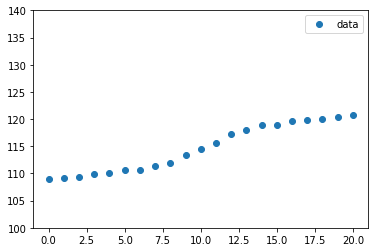

[  72.57437432 -122.50130061]


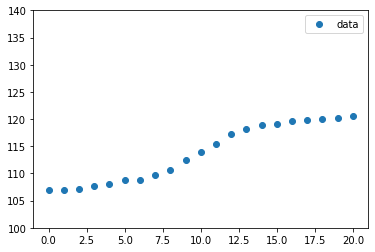

[  72.69162191 -122.42643946]


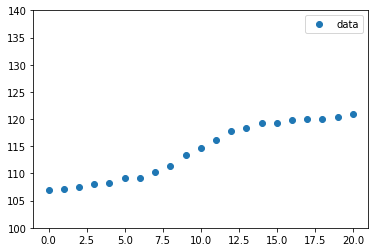

[  72.70271387 -122.45244573]


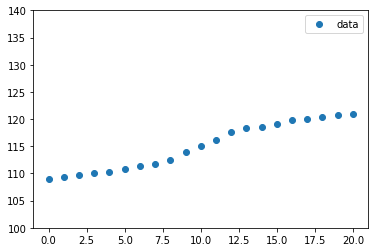

[  72.62184461 -122.50393575]


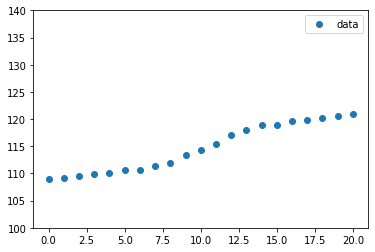

[  72.64793921 -122.45604681]


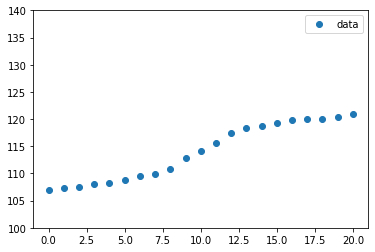

[  72.6884125  -122.43309474]


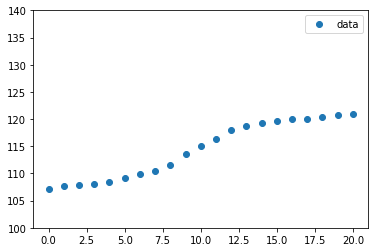

[  72.6400525 -122.4923292]


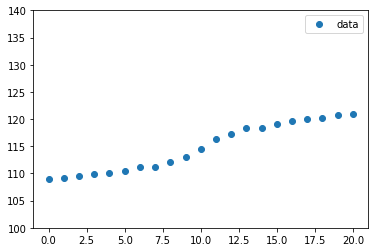

[  72.59101744 -122.5239766 ]


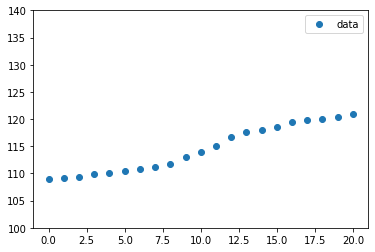

[  72.60295845 -122.48479763]


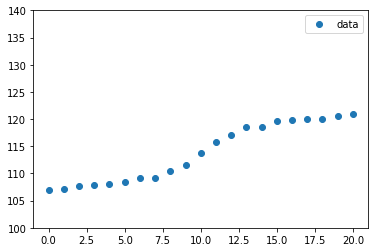

[  72.65105818 -122.4558724 ]


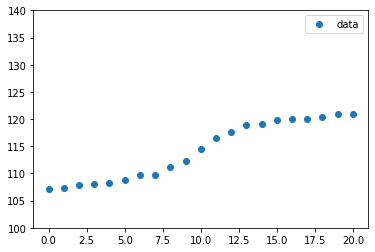

[  72.64087484 -122.49235428]


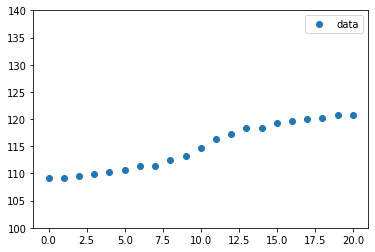

[  72.61032111 -122.51085543]


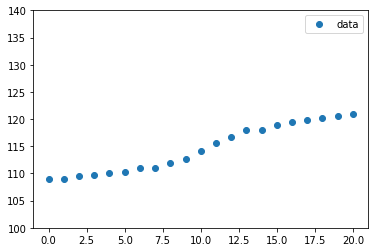

[  72.56143471 -122.5163374 ]


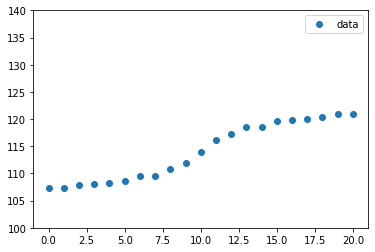

[  72.51508512 -122.55135441]


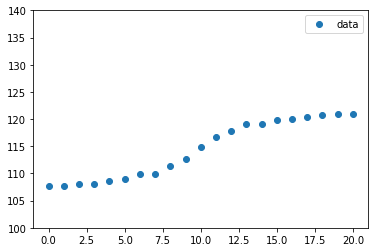

[  72.6513289  -122.48695208]


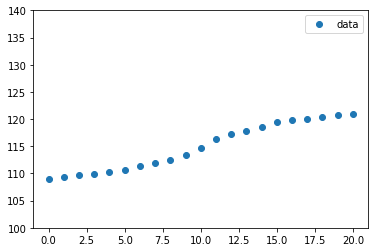

[  72.62449925 -122.50146108]


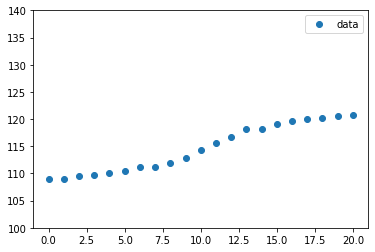

[  72.59055701 -122.50089973]


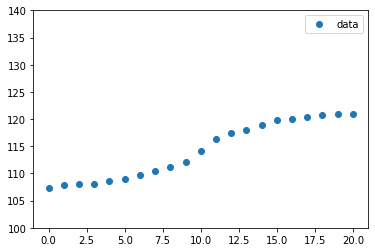

[  72.59905503 -122.4981459 ]


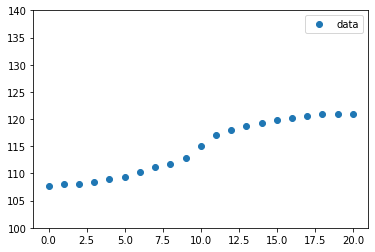

[  72.62478464 -122.50668737]


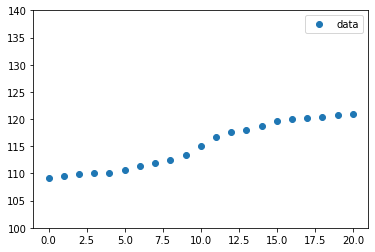

[  72.59283074 -122.5240665 ]


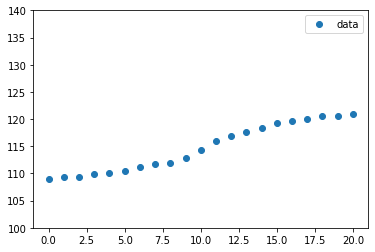

[  72.57603685 -122.51014797]


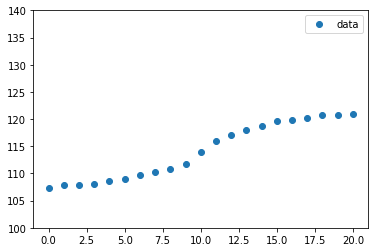

[  72.56163487 -122.52317997]


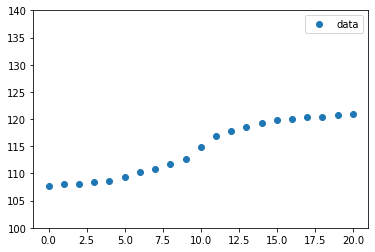

[  72.61482853 -122.51148783]


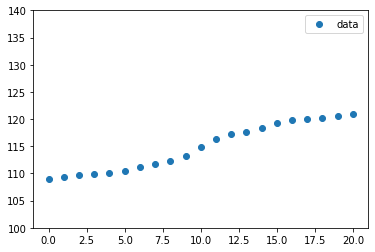

[  72.56935757 -122.53952708]


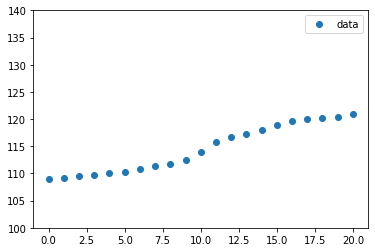

[  72.54491424 -122.53097358]


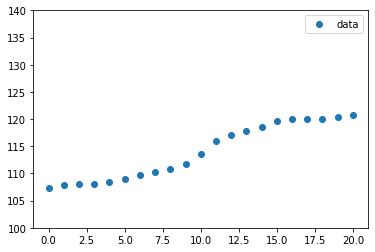

[  72.56358297 -122.5218867 ]


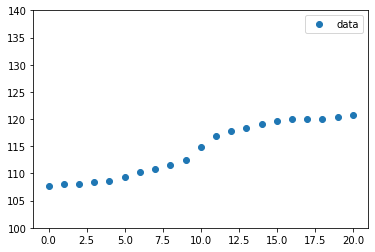

[  72.66255931 -122.47778934]


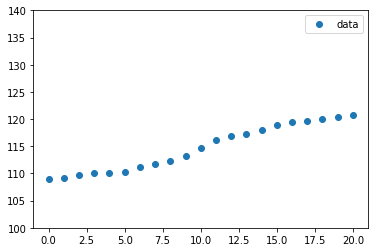

[  72.52673337 -122.56655491]


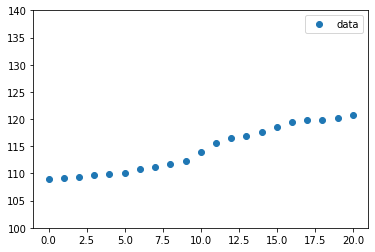

[  72.54348376 -122.53127797]


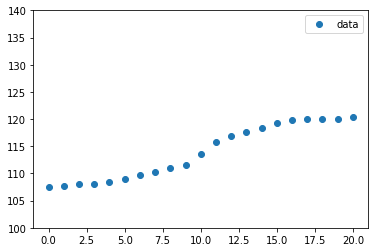

[  72.59947767 -122.49854289]


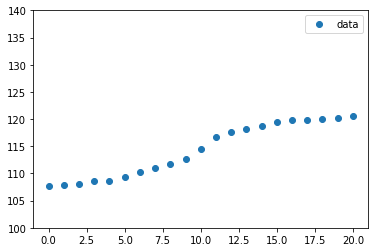

[  72.66988647 -122.47558186]


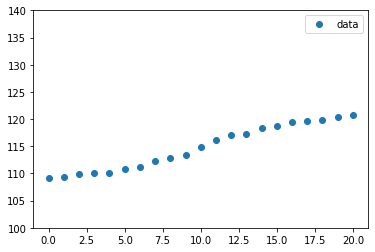

[  72.64658808 -122.48839823]


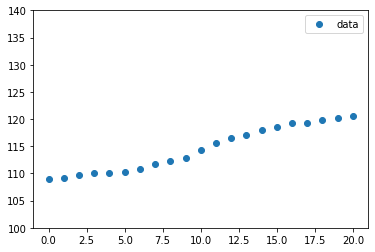

[  72.54327939 -122.53813631]


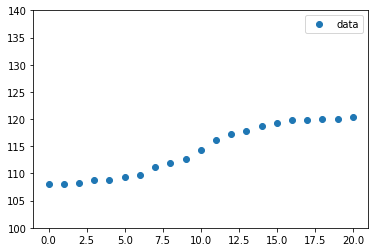

[  72.69967235 -122.43648179]


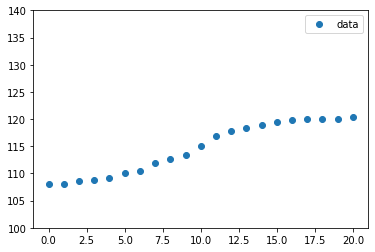

[  72.69098743 -122.46099832]


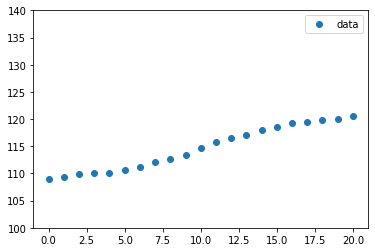

[  72.62523664 -122.50242795]


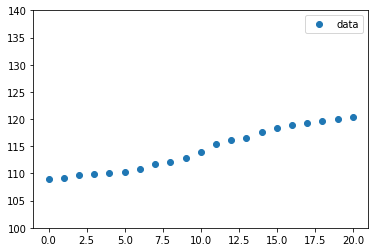

[  72.6188431  -122.48812468]


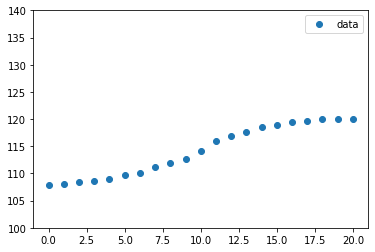

[  72.82335123 -122.35613387]


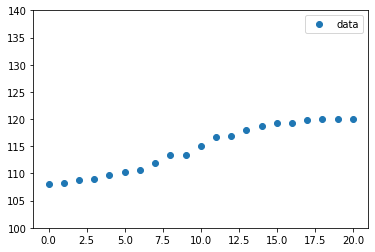

[  72.6773947  -122.47066381]


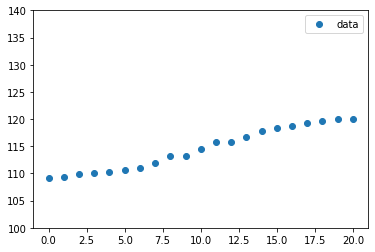

[  72.63432599 -122.49643208]


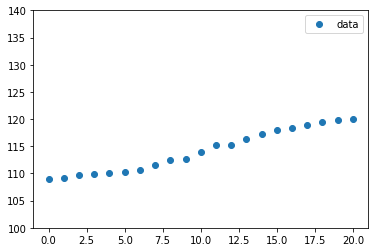

[  72.67606941 -122.45216906]


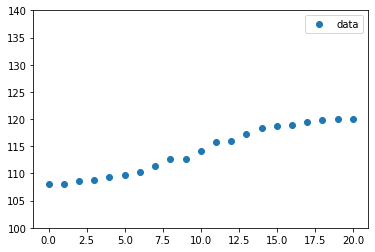

[  72.79937656 -122.37444929]


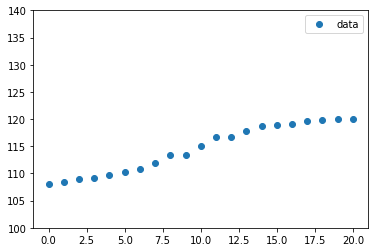

[  72.66958753 -122.47872072]


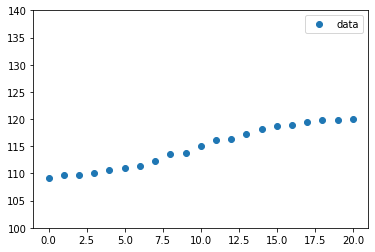

[  72.61084206 -122.51489443]


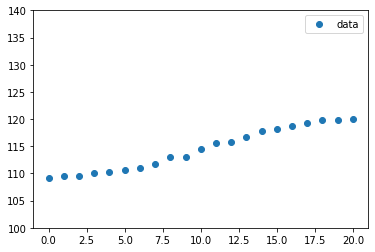

[  72.72088803 -122.42399928]


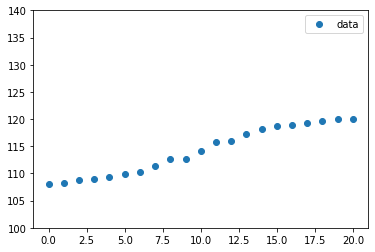

[  72.74283992 -122.41432832]


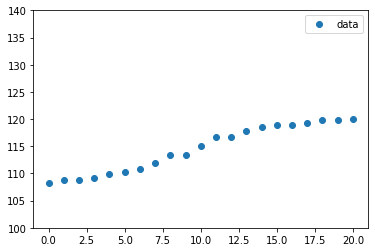

[  72.69682696 -122.45806741]


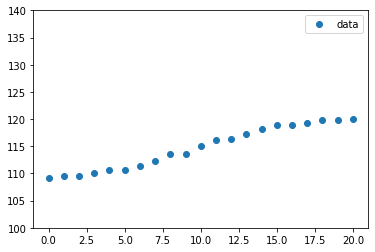

[  72.61316337 -122.51158359]


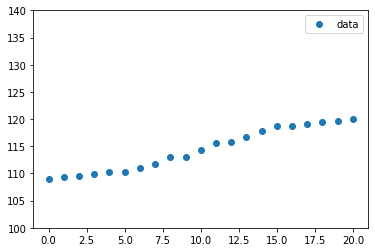

[  72.65027636 -122.47288433]


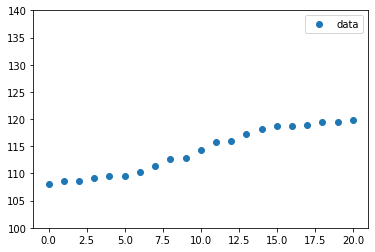

[  72.80317276 -122.38552523]


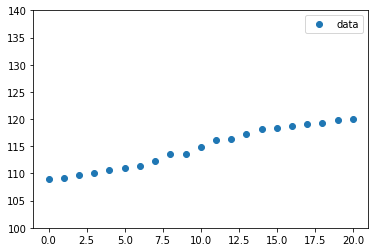

[  72.62524472 -122.50148665]


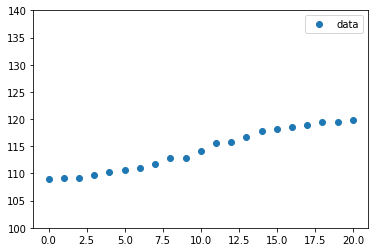

[  72.6498363  -122.47580952]


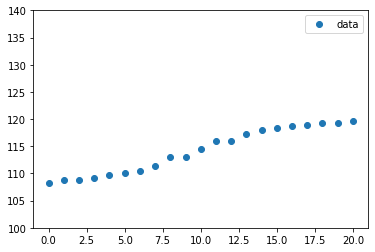

[  72.81087534 -122.37941443]


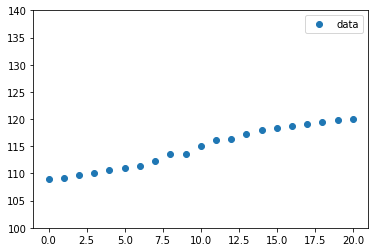

[  72.65787477 -122.47918018]


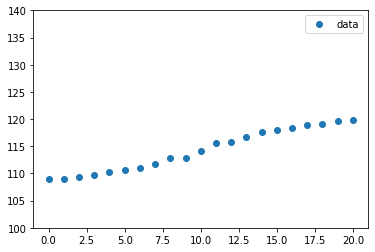

[  72.65271099 -122.46930528]


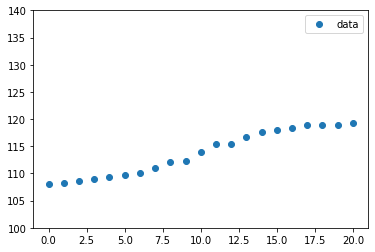

[  72.72896028 -122.42373649]


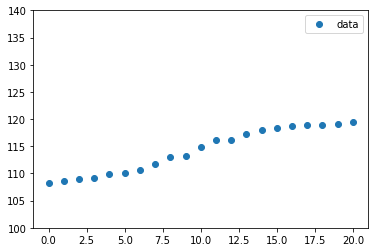

[  72.64893083 -122.48475896]


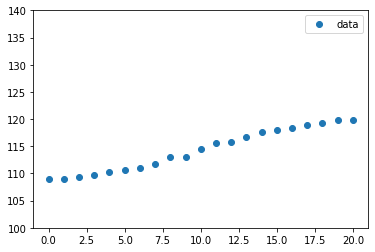

[  72.72919774 -122.42045656]


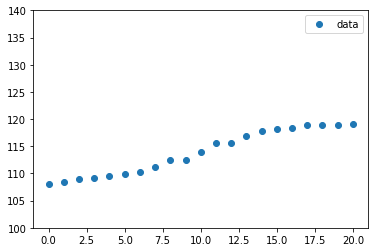

[  72.7805248  -122.39060534]


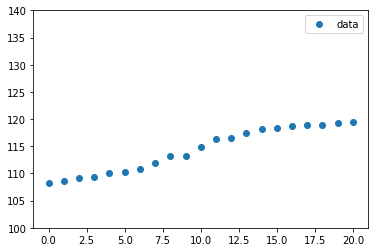

[  72.64398256 -122.48844153]


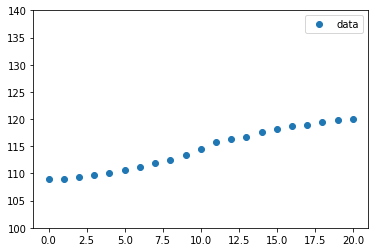

[  72.74654148 -122.40830297]


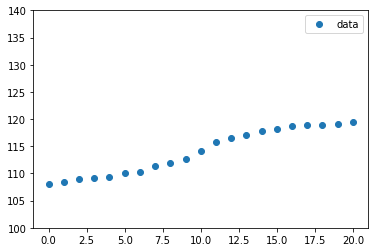

[  72.81247675 -122.3681095 ]


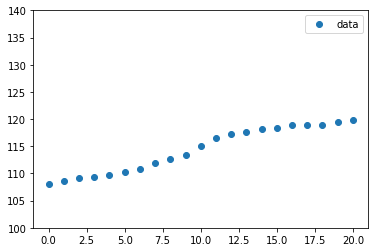

[  72.72809364 -122.43405871]


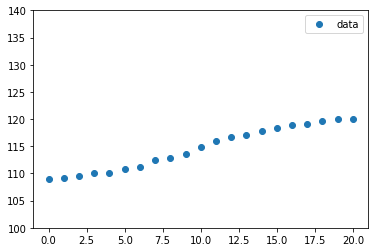

[  72.58580563 -122.52561005]


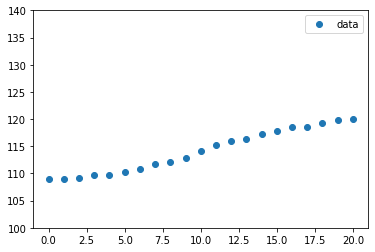

[  72.7113621  -122.43224142]


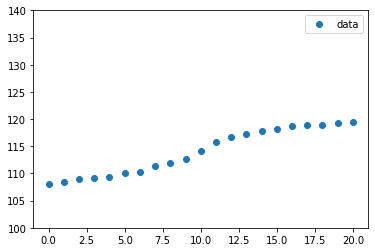

[  72.79448182 -122.38164134]


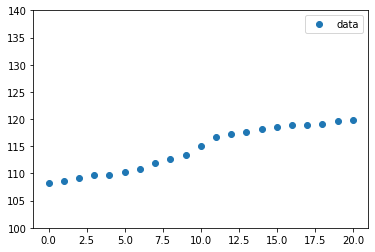

[  72.70644985 -122.44492044]


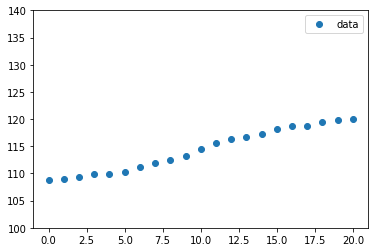

[  72.74769996 -122.40838944]


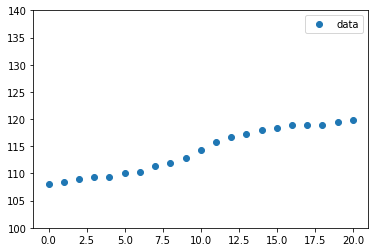

[  72.65224647 -122.48180562]


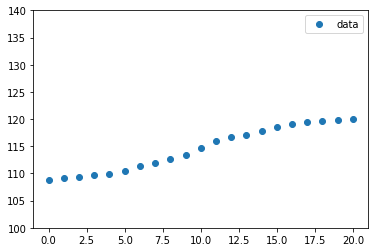

[  72.68117073 -122.45404612]


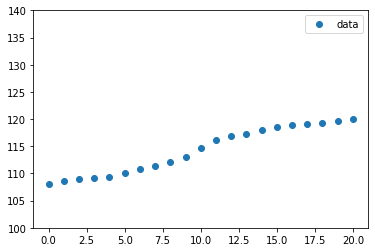

[  72.59397724 -122.51742723]


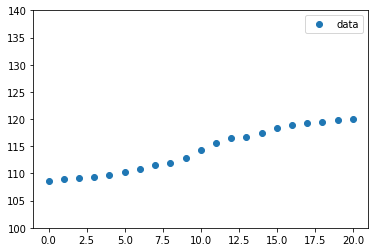

[  72.62729748 -122.48618041]


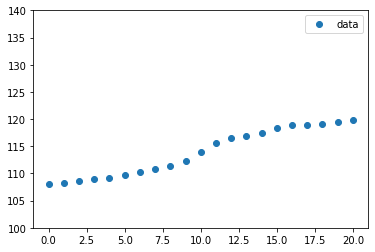

[  72.68808257 -122.44945954]


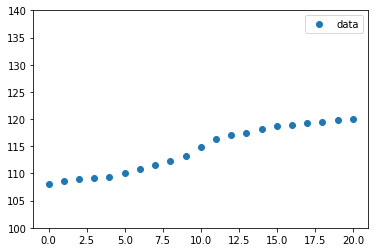

[  72.56849165 -122.53522597]


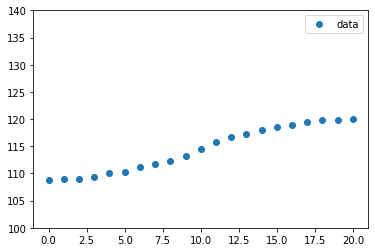

[  72.63936511 -122.47817779]


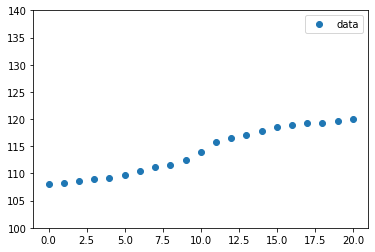

[  72.72837457 -122.42209947]


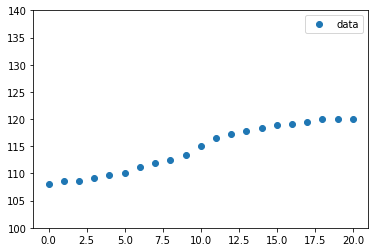

[  72.56855664 -122.53629933]


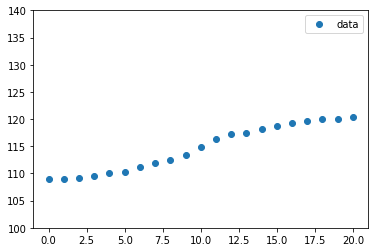

[  72.5166029  -122.56797737]


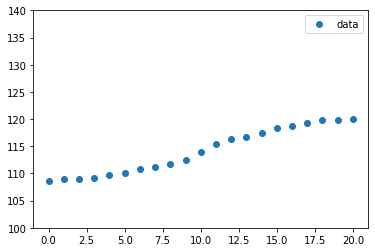

[  72.65207906 -122.46873067]


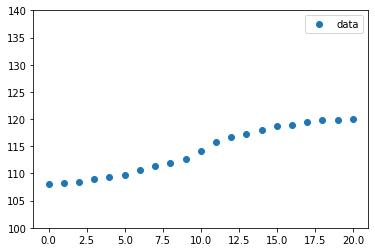

[  72.78299868 -122.38656133]


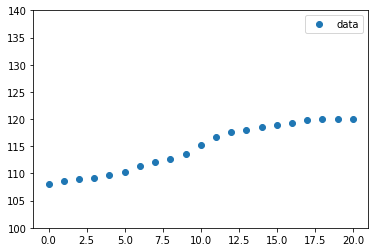

[  72.45915165 -122.60736432]


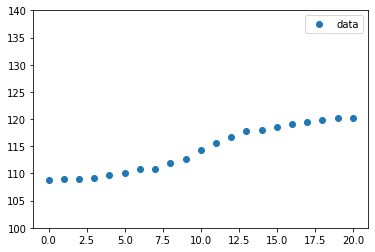

[  72.67972166 -122.45086368]


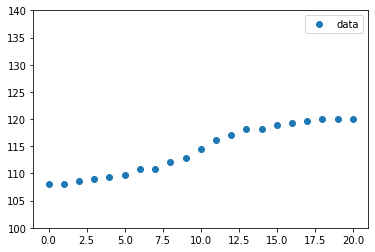

[  72.47139393 -122.60102864]


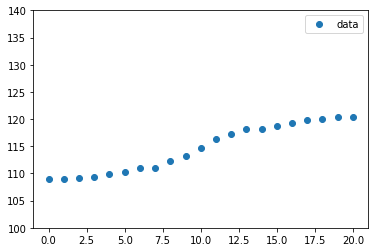

[  72.68076378 -122.45018029]


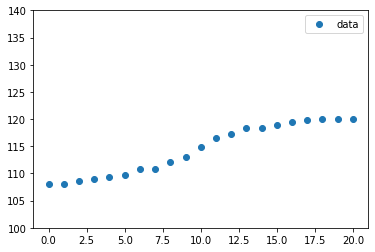

[  72.51785627 -122.56665006]


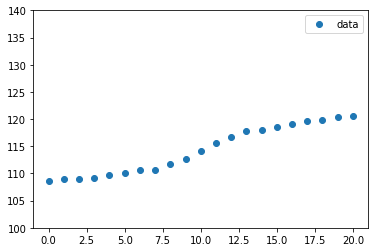

[  72.54980243 -122.53408882]


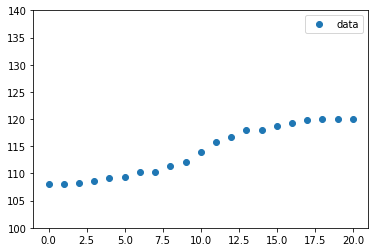

[  72.68674674 -122.44514534]


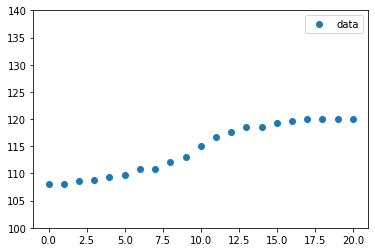

[  72.55377158 -122.54221652]


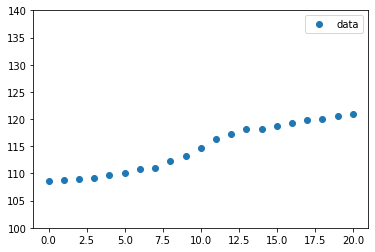

[  72.50481886 -122.5632504 ]


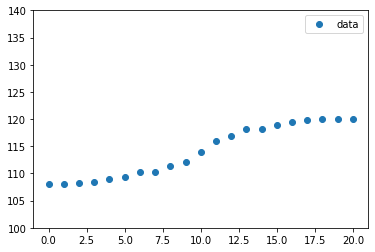

[  72.7303744  -122.41661011]


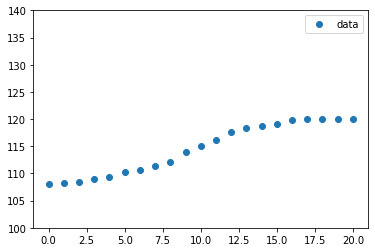

[  72.60108678 -122.50846066]


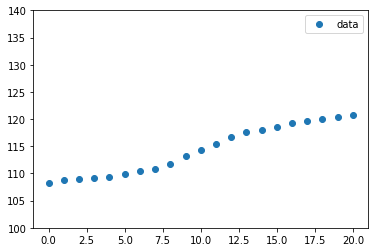

[  72.55057504 -122.53288176]


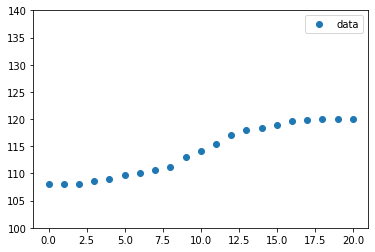

[  72.6753215  -122.45805162]


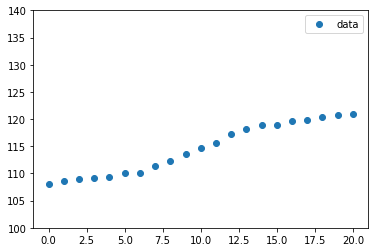

[  72.50187807 -122.565053  ]


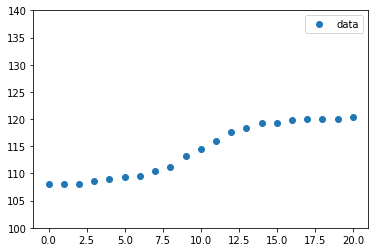

[  72.66013719 -122.4646671 ]


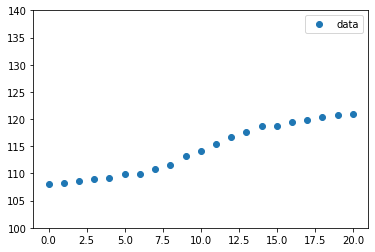

[  72.38475    -122.64167978]


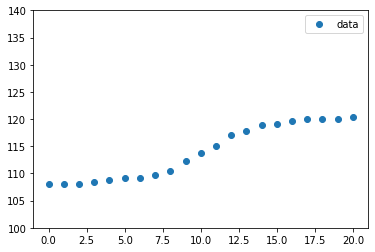

[  72.55187328 -122.53255877]


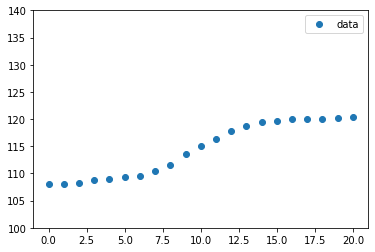

[  72.70207981 -122.43762038]


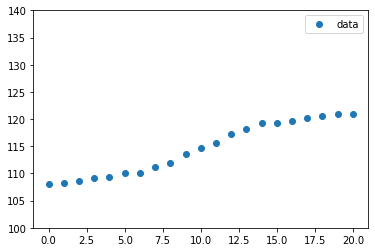

[  72.45212285 -122.59779306]


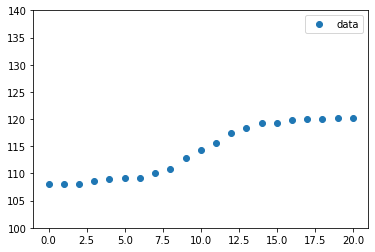

[  72.74682588 -122.40940057]


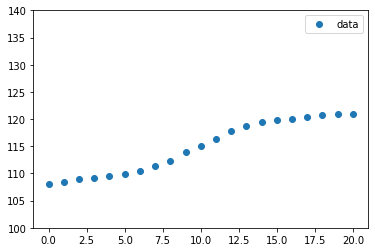

[  72.6410222  -122.47586522]


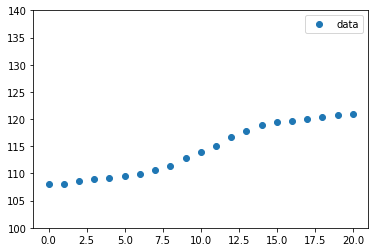

[  72.55080727 -122.53397734]


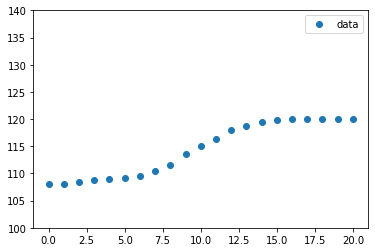

[  72.73845617 -122.41263518]


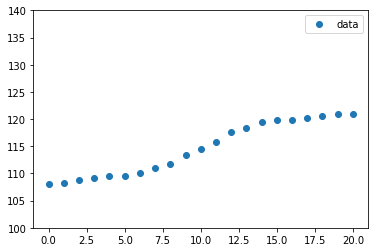

[  72.46452896 -122.58997858]


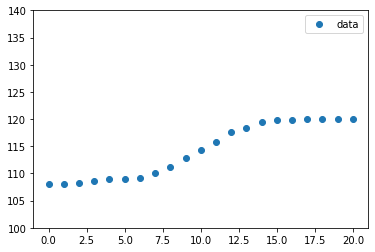

[  72.69982642 -122.43983783]


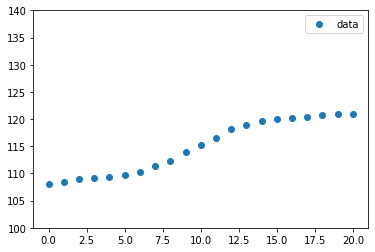

[  72.35720379 -122.6601212 ]


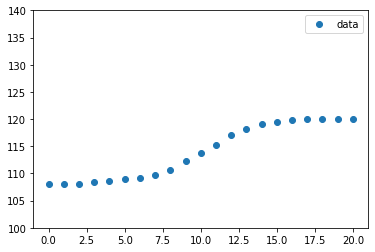

[  72.60121073 -122.50341535]


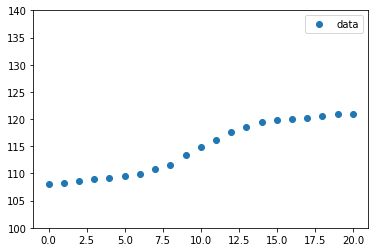

[  72.47626039 -122.58265284]


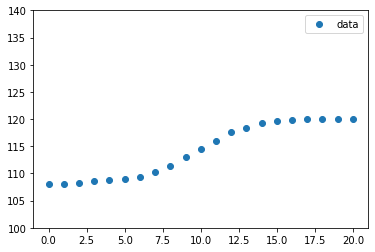

[  72.45158195 -122.59920416]


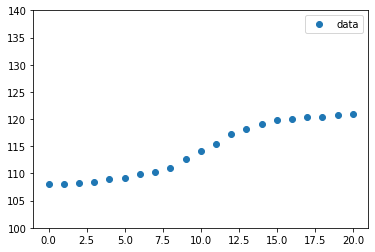

[  72.36640101 -122.65421204]


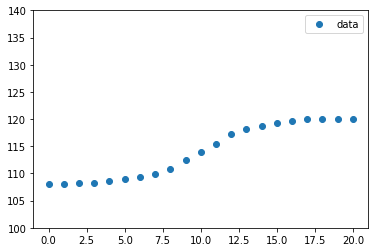

[  72.55201872 -122.53362611]


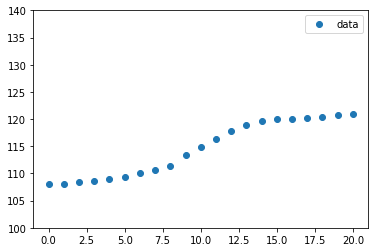

[  72.47313187 -122.58451406]


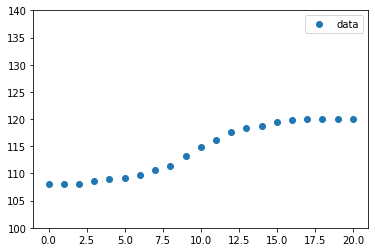

[  72.41860829 -122.61934601]


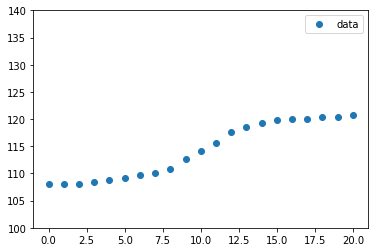

[  72.41861835 -122.61933583]


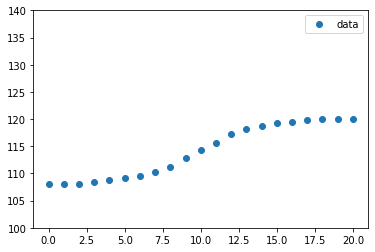

[  72.48055874 -122.57901961]


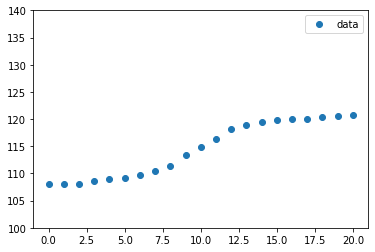

[  72.37012923 -122.65114167]


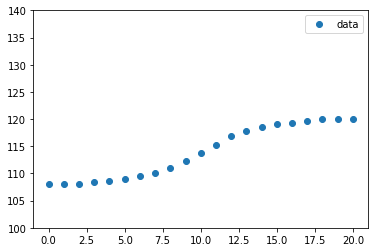

[  72.37342803 -122.64932953]


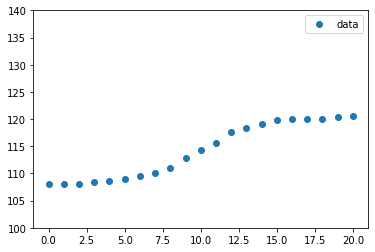

[  72.55363935 -122.53227338]


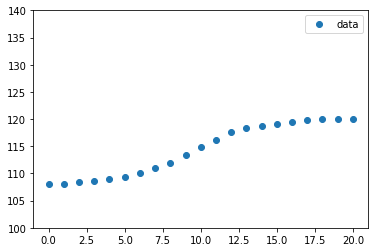

[  72.45346726 -122.59668843]


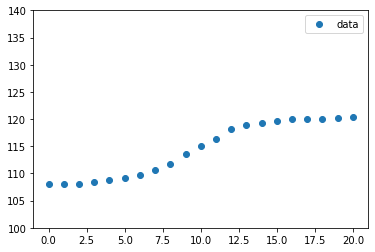

[  72.55505925 -122.53253983]


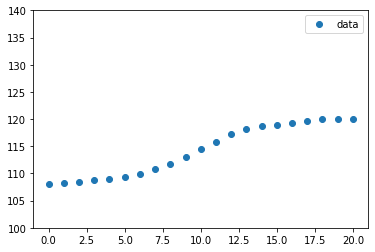

[  72.38269983 -122.64284085]


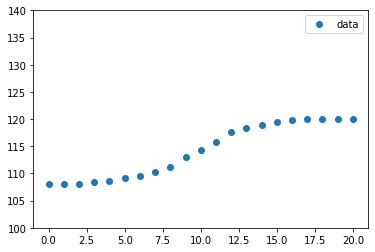

[  72.57319338 -122.5211468 ]


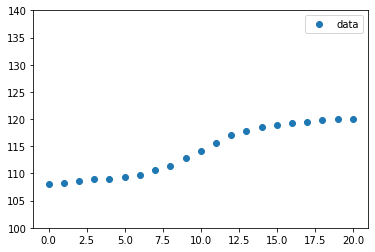

[  72.56631706 -122.52325149]


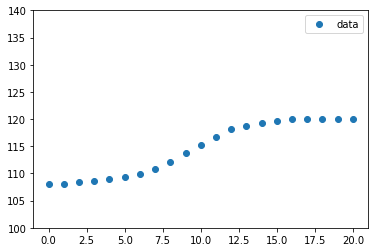

[  72.57529235 -122.52088868]


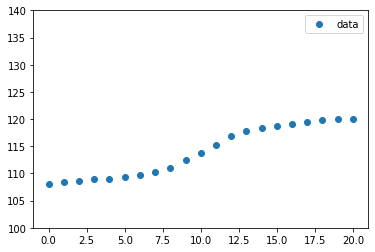

[  72.55652631 -122.52973686]


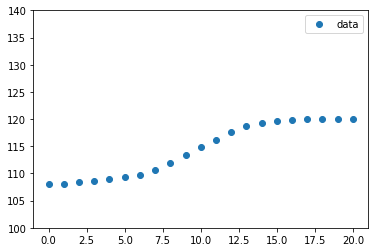

[  72.57369089 -122.52194479]


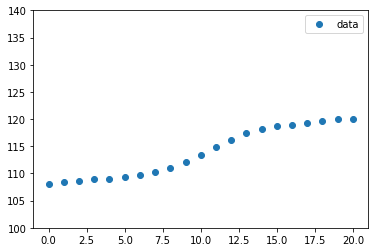

[  72.54532552 -122.53715672]


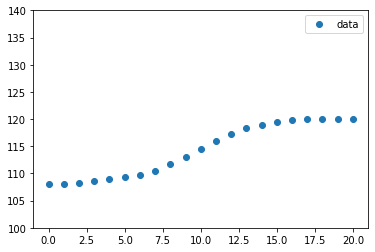

[  72.54728861 -122.54438713]


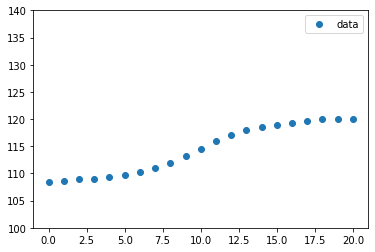

[  72.66772434 -122.45963325]


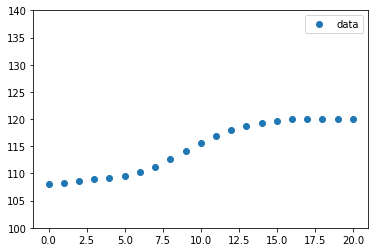

[  72.54533429 -122.54567431]


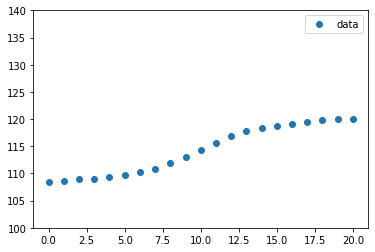

[  72.5939252  -122.51007138]


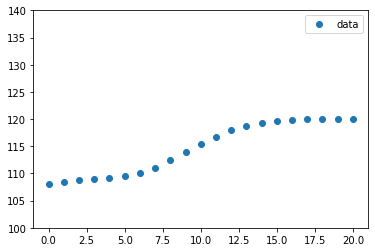

[  72.54101501 -122.54852925]


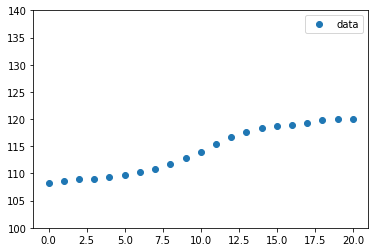

[  72.53508882 -122.55033766]


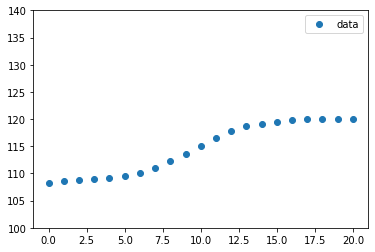

[  72.53191346 -122.55455213]


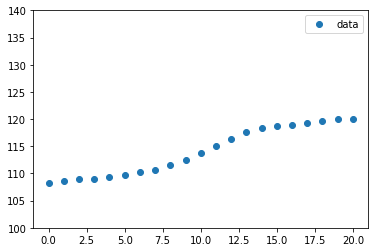

[  72.51563312 -122.56488659]


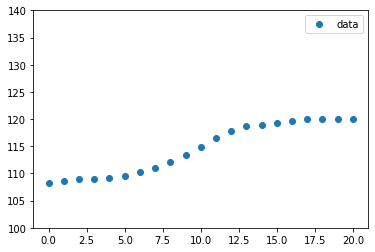

[  72.52316197 -122.56034382]


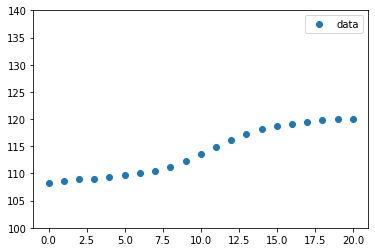

[  72.54962734 -122.54278701]


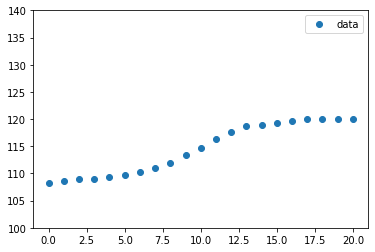

[  72.51815956 -122.56365239]


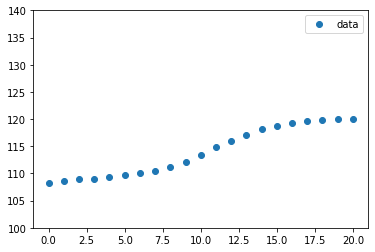

[  72.54979979 -122.54266881]


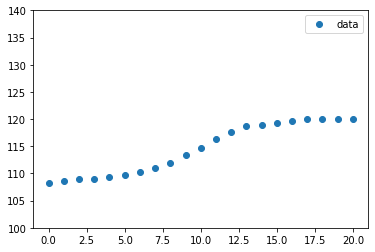

[  72.5155305  -122.56539205]


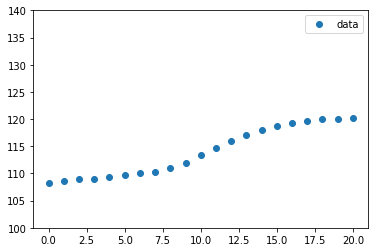

[  72.49438932 -122.58056433]


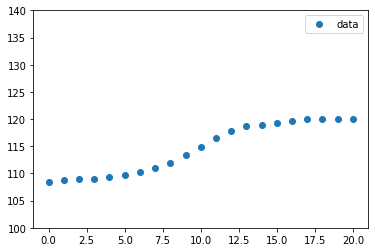

[  72.46441644 -122.60324749]


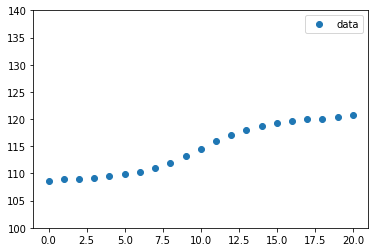

[  72.47669094 -122.59372308]


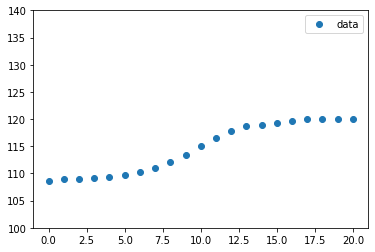

[  72.47697017 -122.59353621]


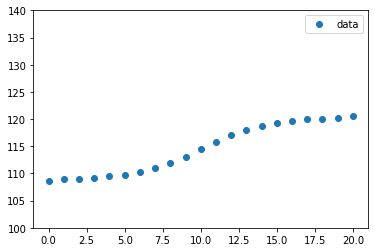

[  72.45870641 -122.60700063]


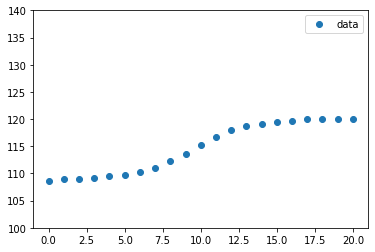

[  72.50121844 -122.576025  ]


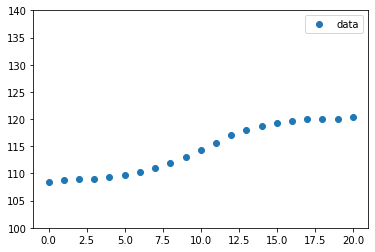

[  72.48792279 -122.58782903]


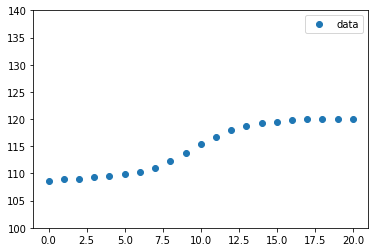

[  72.58852324 -122.51545877]


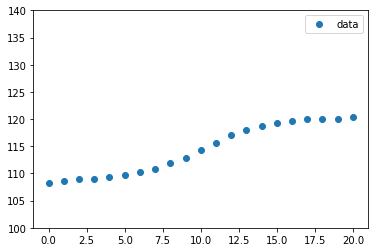

[  72.50862423 -122.57417072]


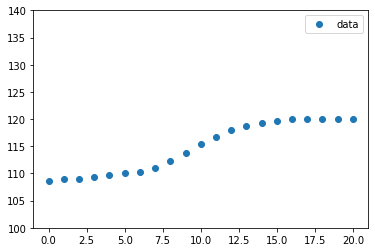

[  72.63072688 -122.48583437]


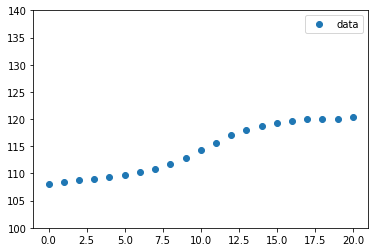

[  72.50878236 -122.57406182]


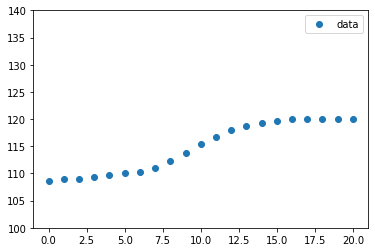

[  72.64129888 -122.47810673]


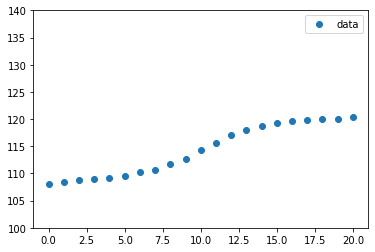

[  72.52151319 -122.5656383 ]


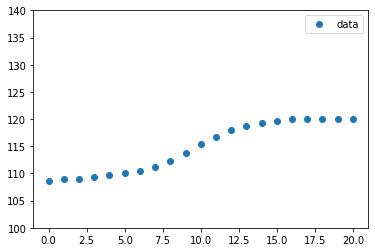

[  72.62421042 -122.48841791]


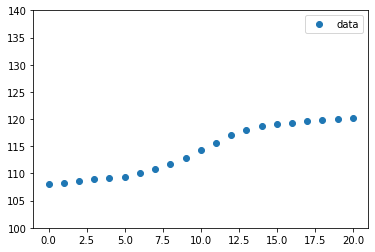

[  72.53467216 -122.55693082]


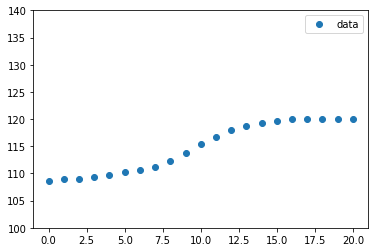

[  72.62780513 -122.48603051]


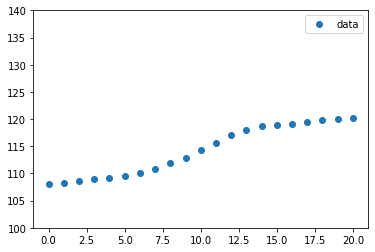

[  72.54955645 -122.54707599]


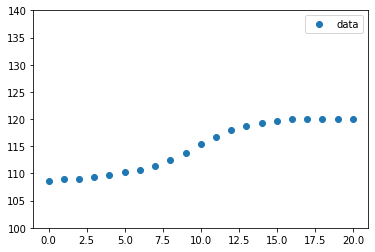

[  72.65652477 -122.46702792]


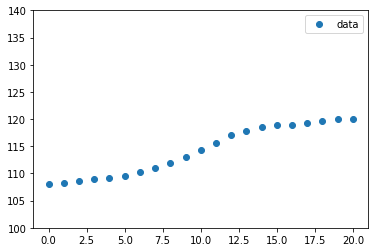

[  72.55827648 -122.54129221]


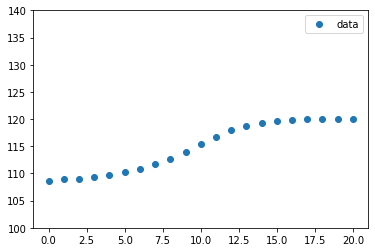

[  72.68090784 -122.45089585]


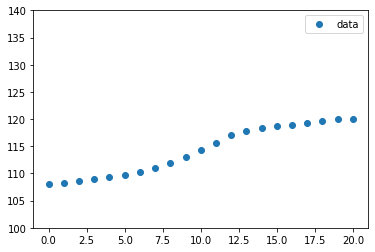

[  72.56746686 -122.53519345]


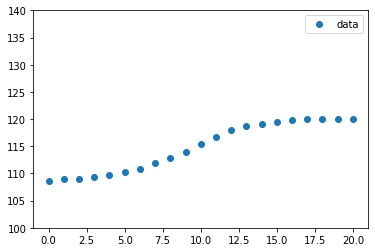

[  72.68079371 -122.45097375]


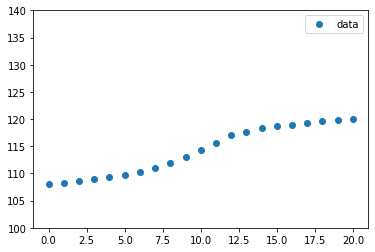

[  72.56777867 -122.5349854 ]


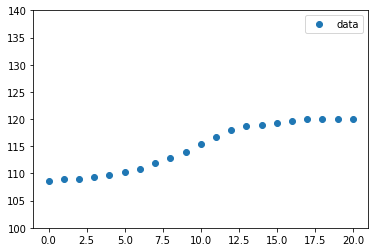

[  72.6812001  -122.45070539]


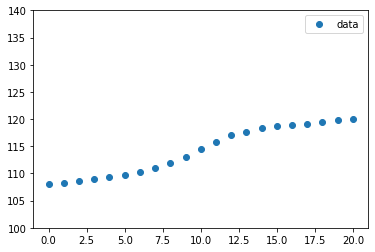

[  72.56161012 -122.53907674]


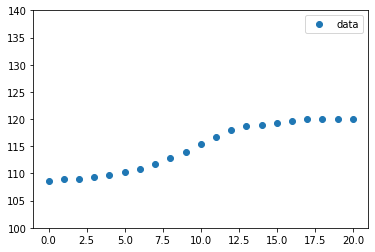

[  72.67559516 -122.4553899 ]


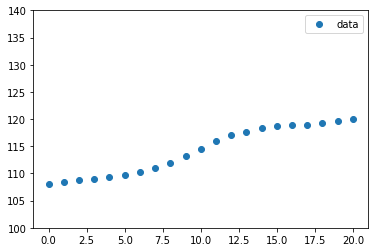

[  72.55539412 -122.54320296]


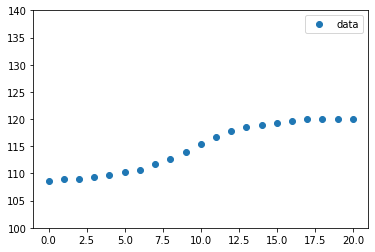

[  72.58872429 -122.50979496]


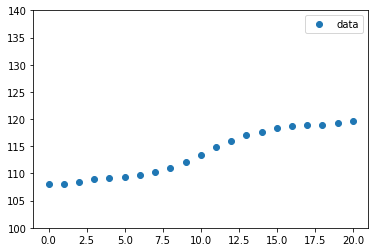

[  72.56089586 -122.5395595 ]


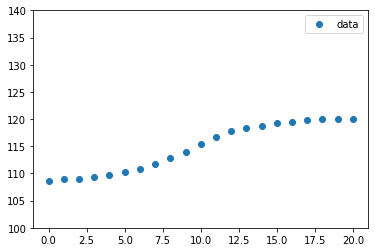

[  72.60529838 -122.499871  ]


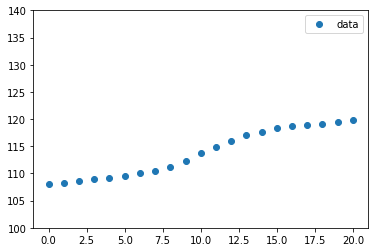

[  72.56687297 -122.53560084]


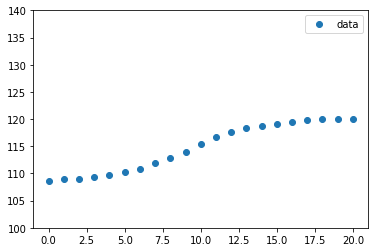

[  72.65418572 -122.46861239]


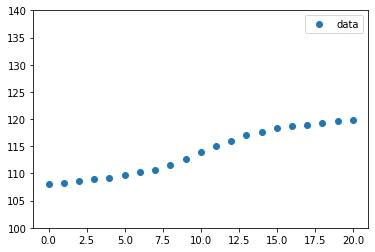

[  72.5735631  -122.53116339]


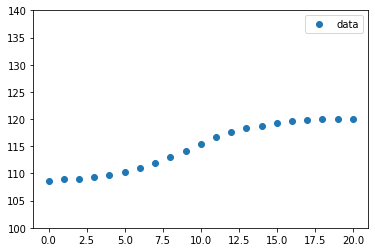

[  72.6777136  -122.45303615]


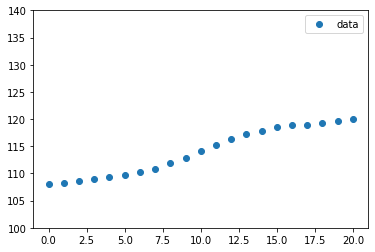

[  72.57426567 -122.53069633]


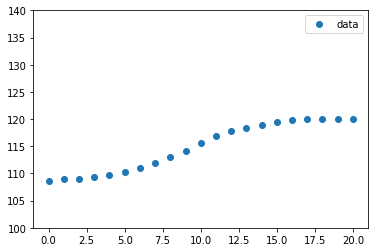

[  72.68123371 -122.45070263]


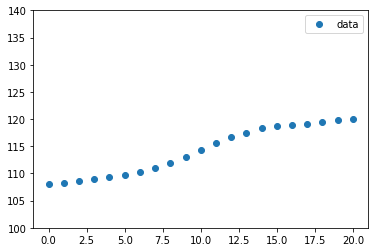

[  72.59020039 -122.51437248]


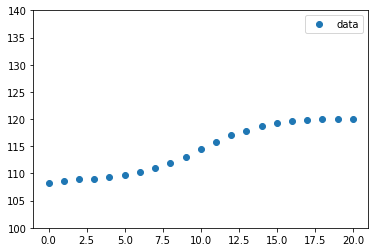

[  72.68276631 -122.45141489]


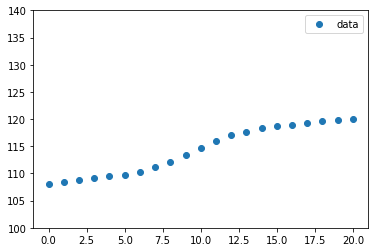

[  72.60028448 -122.50660295]


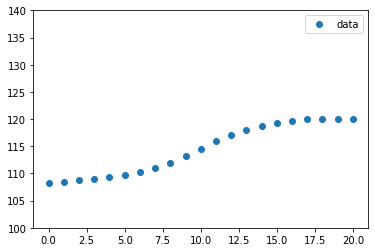

[  72.62468636 -122.48701024]


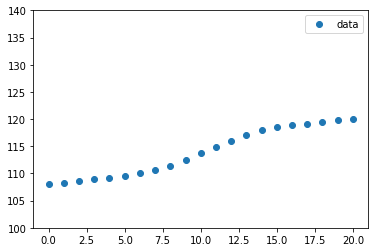

[  72.64157803 -122.47855152]


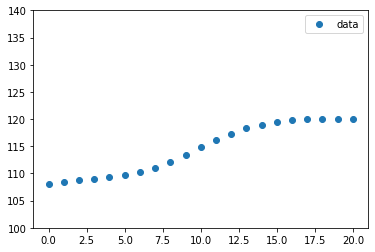

[  72.68560435 -122.44723988]


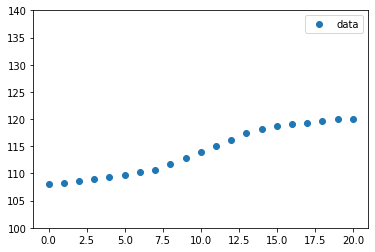

[  72.64180217 -122.47849486]


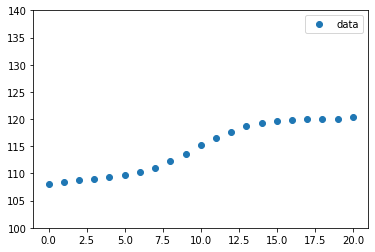

[  72.67898032 -122.45222116]


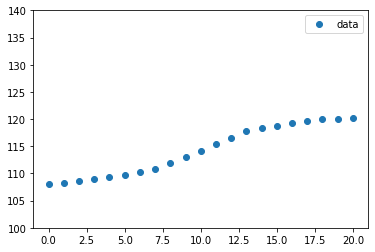

[  72.59871814 -122.50872141]


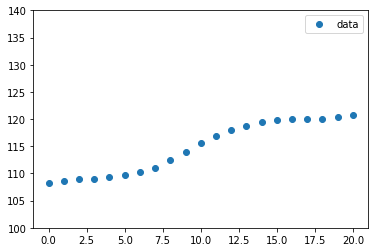

[  72.67624288 -122.45583003]


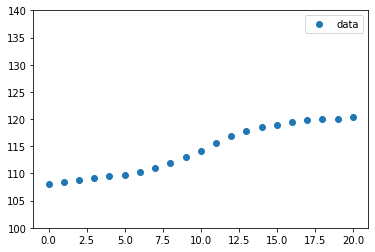

[  72.57851803 -122.51872015]


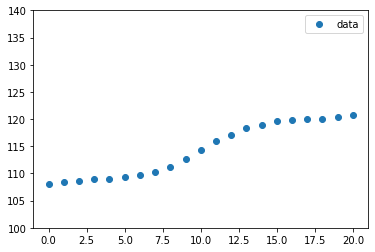

[  72.65383207 -122.47243296]


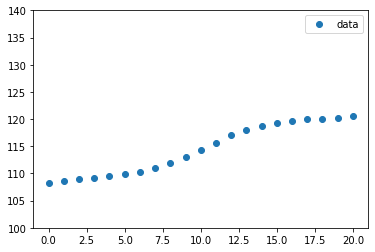

[  72.58226131 -122.51624395]


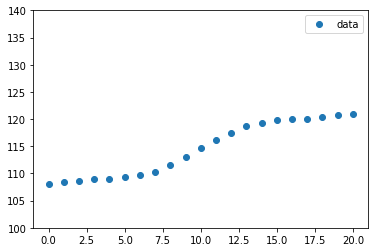

[  72.59706532 -122.5130331 ]


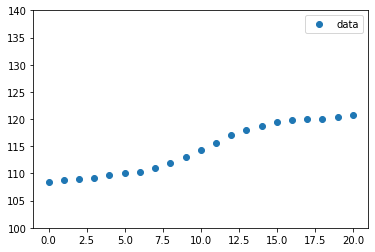

[  72.59303592 -122.5091045 ]


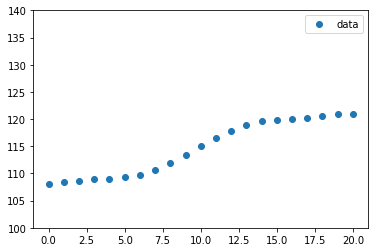

[  72.53709738 -122.55472922]


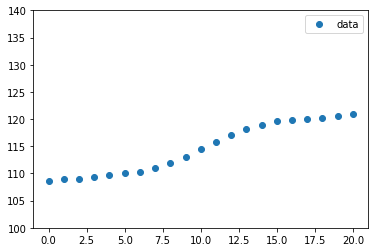

[  72.60235552 -122.50292864]


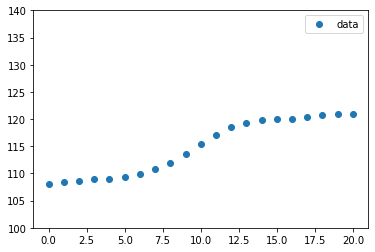

[  72.54743026 -122.54910489]


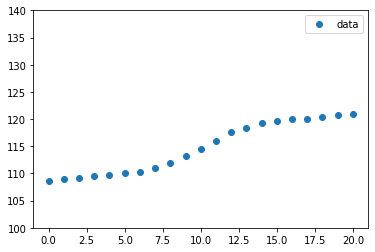

[  72.54128739 -122.54037645]


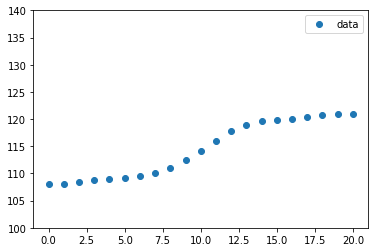

[  72.49680705 -122.58074446]


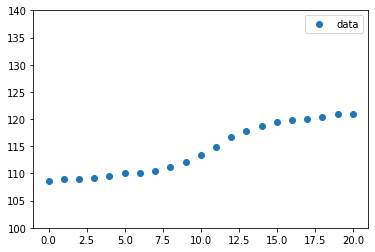

[  72.58071738 -122.51584342]


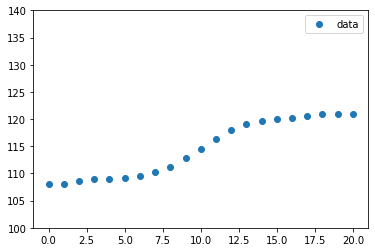

[  72.44845388 -122.61463497]


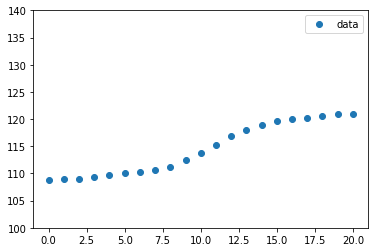

[  72.56910861 -122.52634121]


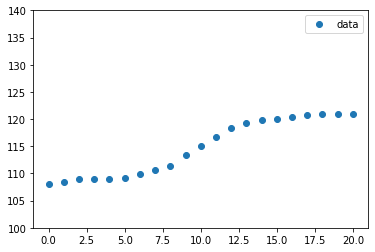

[  72.4664057 -122.6038865]


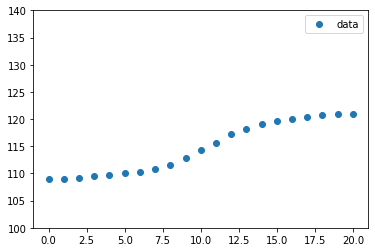

[  72.49003107 -122.57746816]


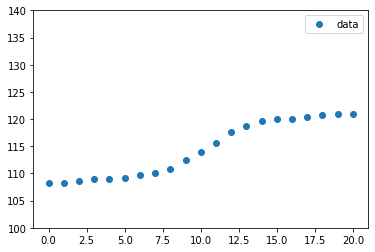

[  72.47633872 -122.59809522]


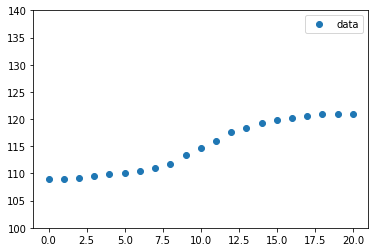

[  72.40904466 -122.63598038]


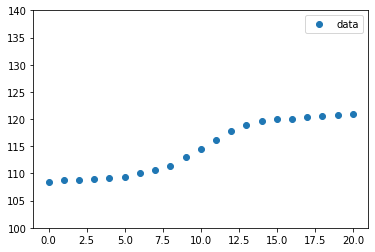

[  72.40868502 -122.64224356]


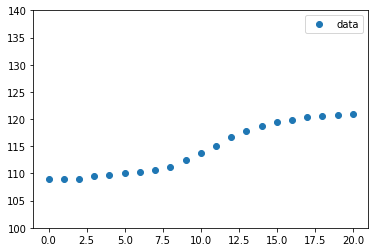

[  72.45466065 -122.60733592]


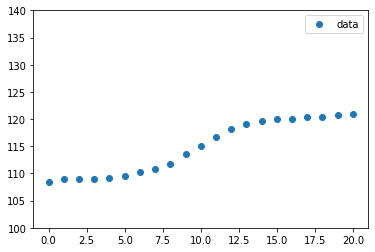

[  72.4860228  -122.59335631]


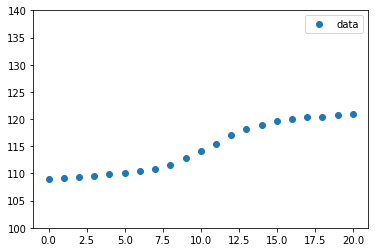

[  72.42003709 -122.63218061]


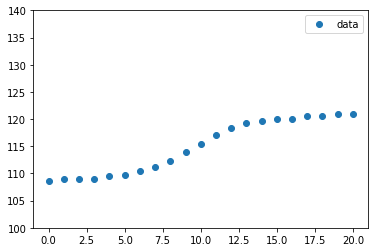

[  72.51508216 -122.57518065]


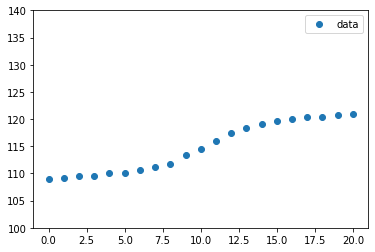

[  72.36458898 -122.66886658]


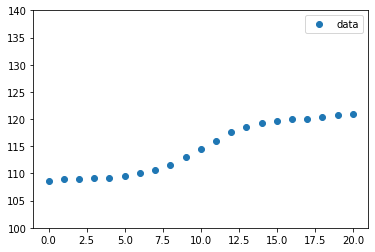

[  72.47091291 -122.60244089]


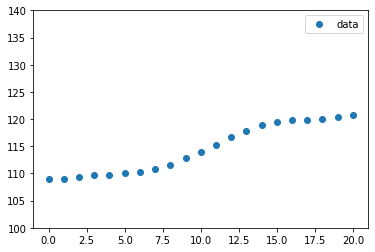

[  72.36538532 -122.66977914]


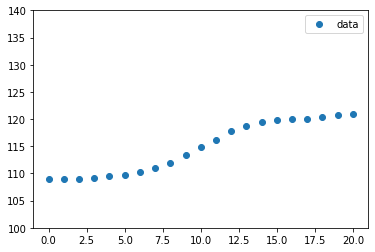

[  72.48245941 -122.59479398]


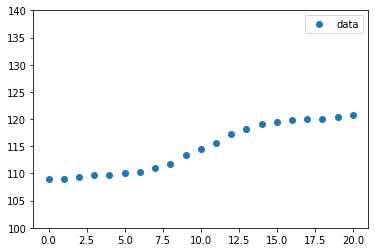

[  72.47635897 -122.59786757]


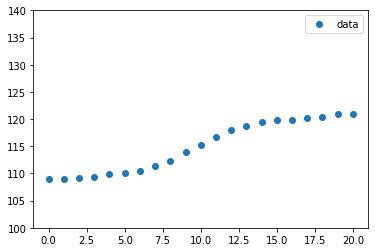

[  72.34977043 -122.68089818]


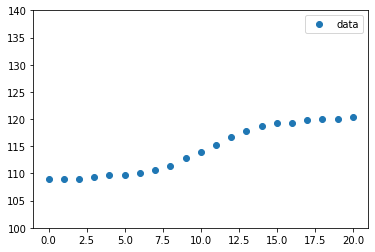

[  72.33934696 -122.68758762]


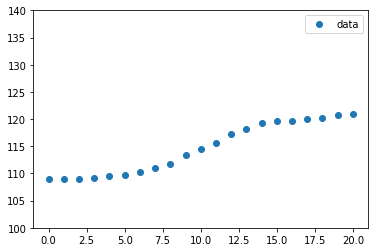

[  72.36230441 -122.67261272]


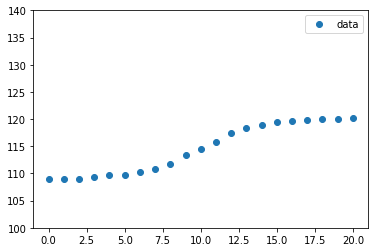

[  72.46717016 -122.60353848]


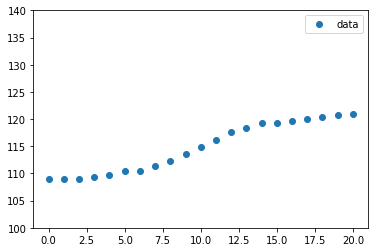

[  72.22976788 -122.75946005]


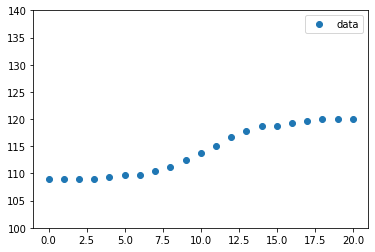

[  72.40092248 -122.64715147]


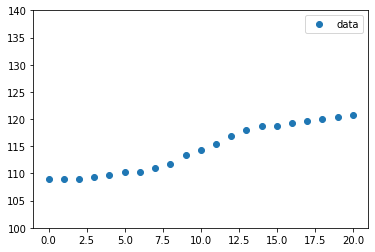

[  72.25942759 -122.73992392]


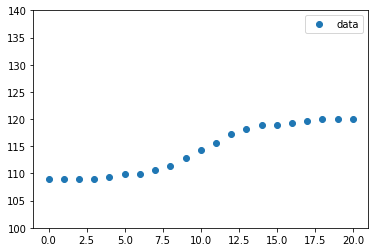

[  72.53083703 -122.56213007]


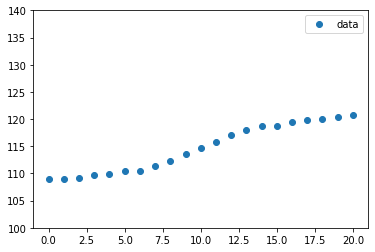

[  72.32282135 -122.6983155 ]


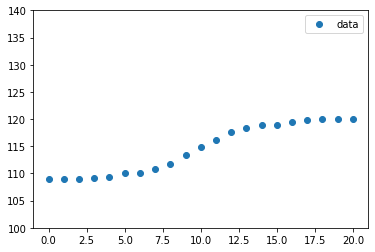

[  72.49165254 -122.58792729]


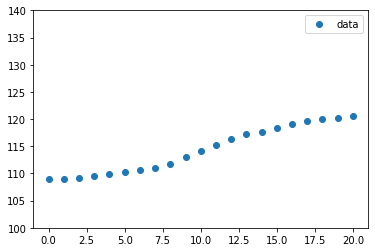

[  72.24269622 -122.75089558]


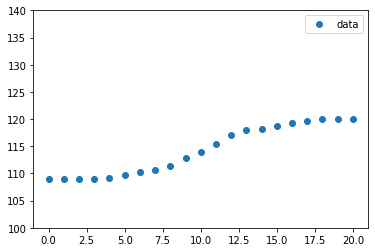

[  72.57097035 -122.53598485]


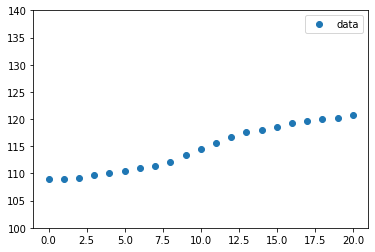

[  72.28619786 -122.7222685 ]


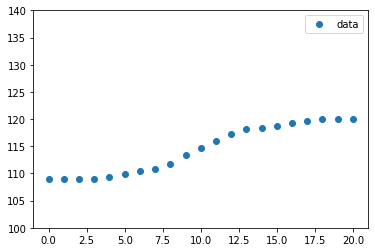

[  72.41919337 -122.6351237 ]


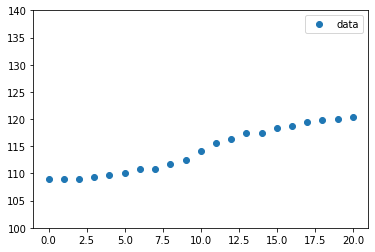

[  72.30701359 -122.70675866]


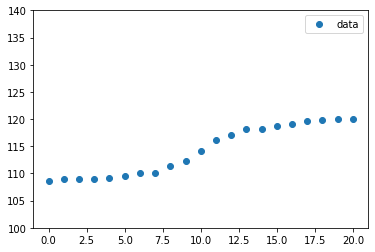

[  72.51539678 -122.57209486]


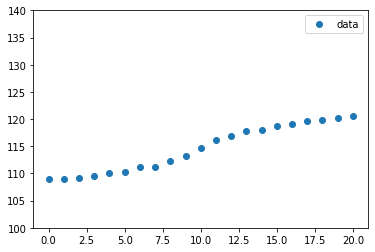

[  72.37722139 -122.66051491]


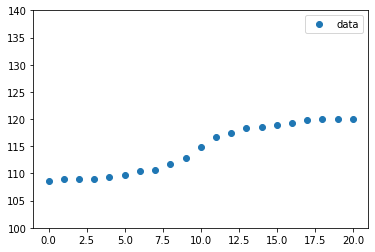

[  72.41811485 -122.63569425]


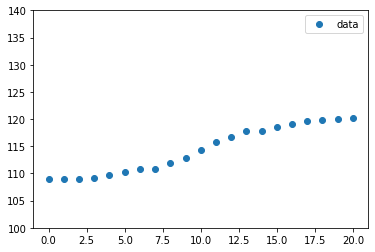

[  72.41854109 -122.63132896]


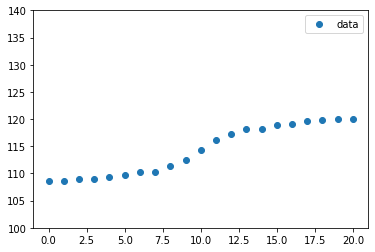

[  72.54622036 -122.5516658 ]


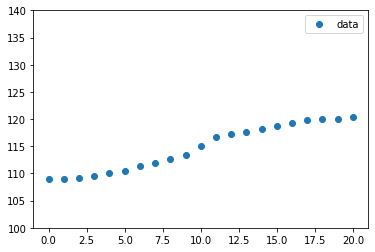

[  72.36652497 -122.66955697]


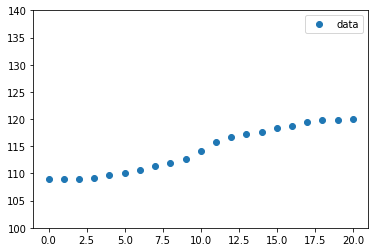

[  72.48319463 -122.58545824]


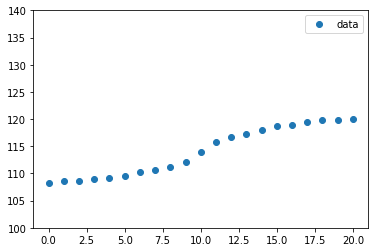

[  72.51155136 -122.57007799]


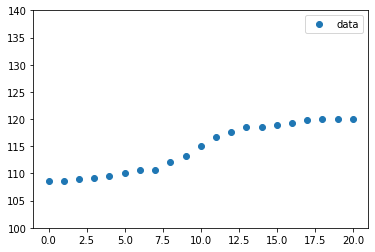

[  72.47870608 -122.59579988]


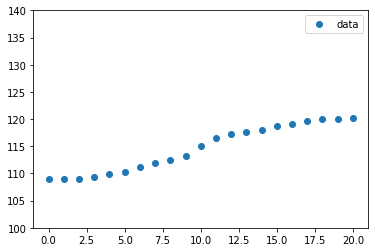

[  72.33607105 -122.68962002]


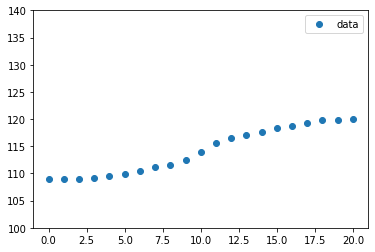

[  72.55037231 -122.54109776]


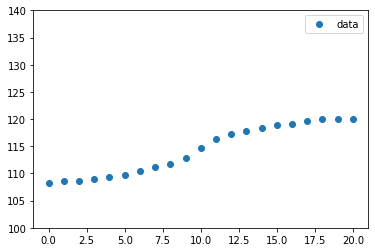

[  72.40819717 -122.64252106]


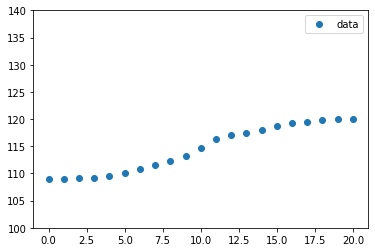

[  72.61537583 -122.49506121]


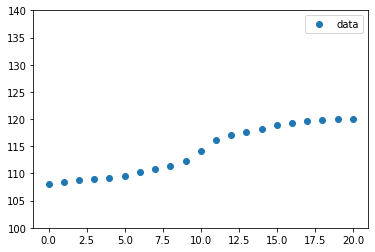

[  72.34805761 -122.68166031]


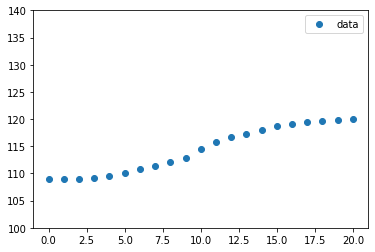

[  72.577896   -122.51771404]


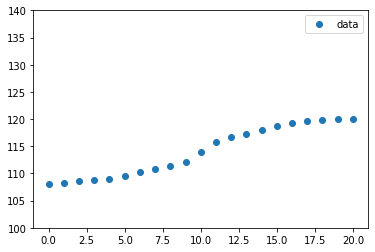

[  72.65741005 -122.46902516]


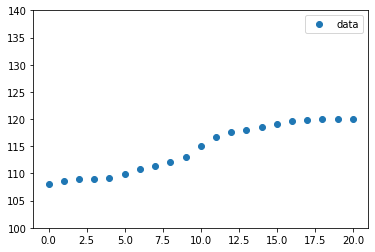

[  72.48374823 -122.59274673]


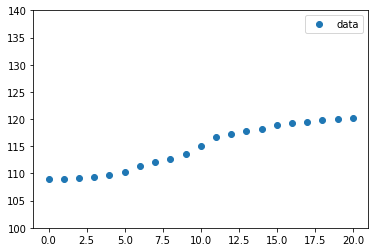

[  72.36322668 -122.67190003]


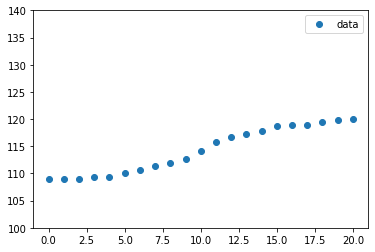

[  72.58921459 -122.50869084]


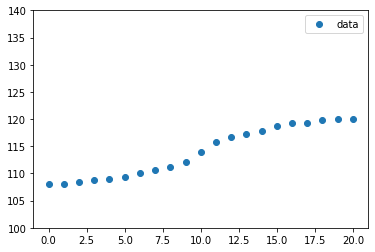

[  72.68719276 -122.4462572 ]


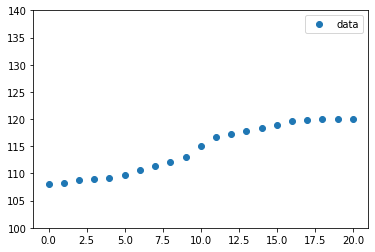

[  72.47164663 -122.60099979]


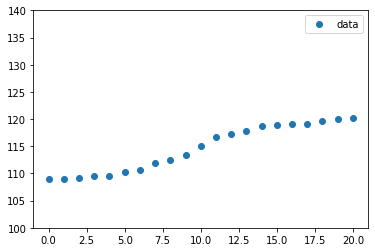

[  72.29482713 -122.71683449]


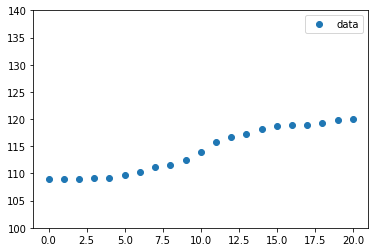

[  72.51674709 -122.5557042 ]


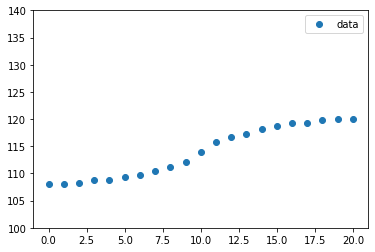

[  72.690102  -122.4432225]


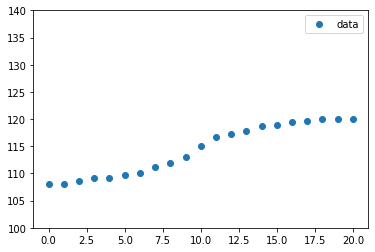

[  72.36447748 -122.67096561]


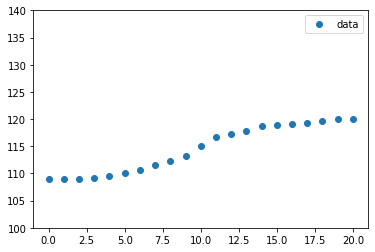

[  72.29565389 -122.71482878]


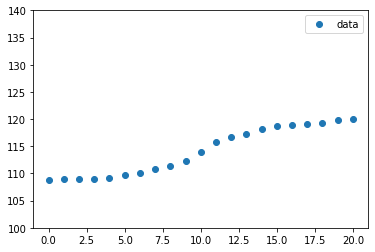

[  72.43551263 -122.60850615]


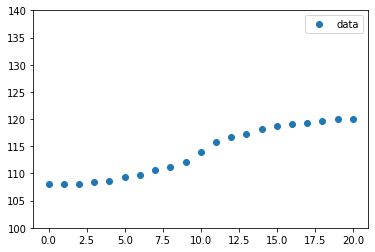

[  72.62106706 -122.48748793]


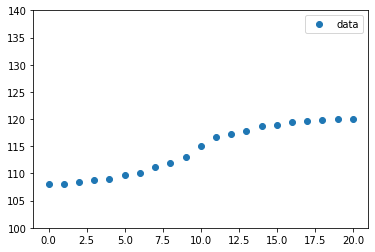

[  72.36670335 -122.66942107]


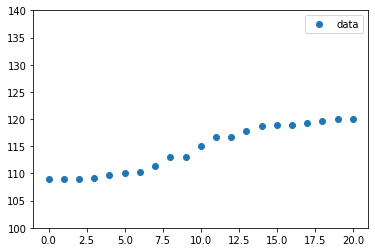

[  72.28936296 -122.71959752]


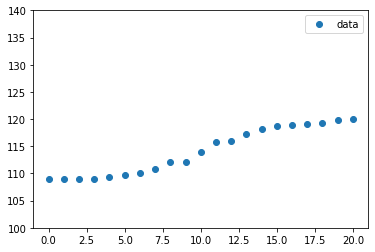

[  72.46856972 -122.58663443]


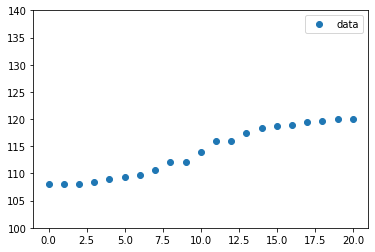

[  72.60546229 -122.49730799]


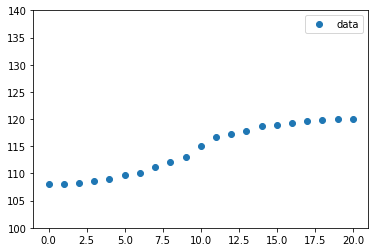

[  72.36668036 -122.66943587]


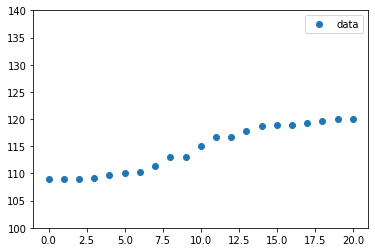

[  72.34060272 -122.68457564]


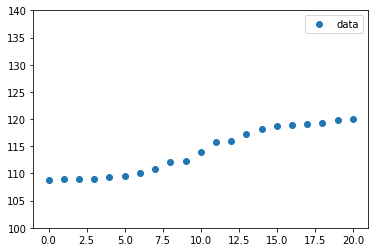

[  72.51102562 -122.55797652]


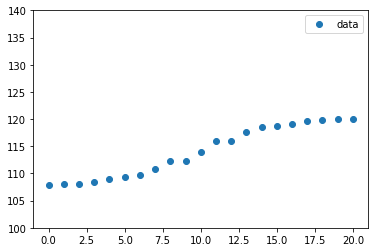

[  72.65727775 -122.46306709]


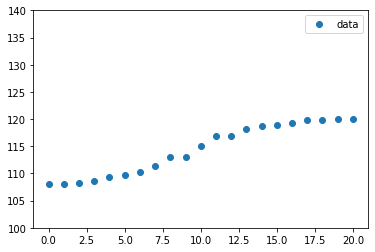

[  72.3890783  -122.65401307]


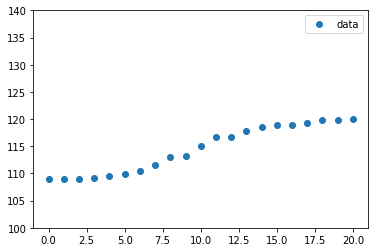

[  72.36154027 -122.67011425]


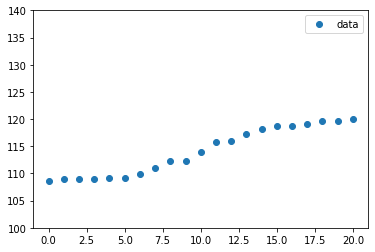

[  72.54632192 -122.53363248]


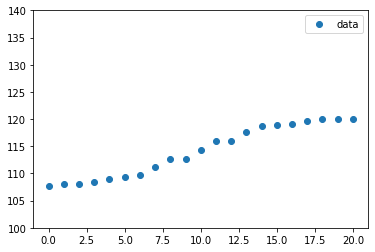

[  72.63063158 -122.48056053]


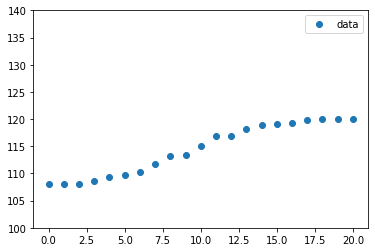

[  72.38332761 -122.65703264]


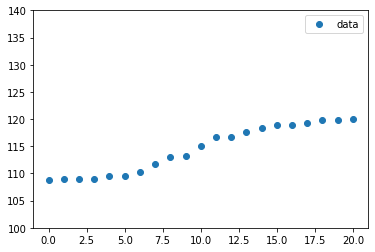

[  72.43130641 -122.62240751]


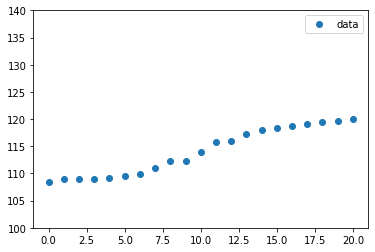

[  72.61461109 -122.48294078]


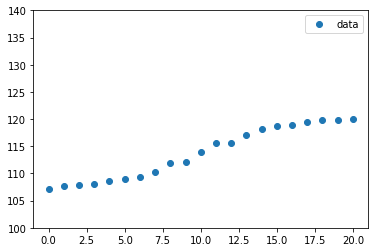

[  72.62457694 -122.48063587]


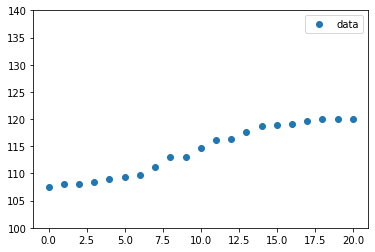

[  72.51921682 -122.56559977]


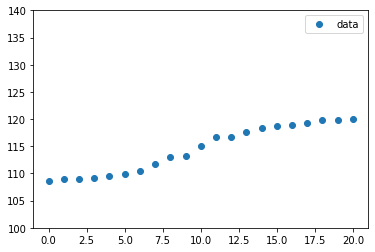

[  72.58449521 -122.51844967]


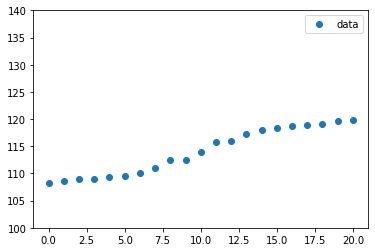

[  72.71454818 -122.41457044]


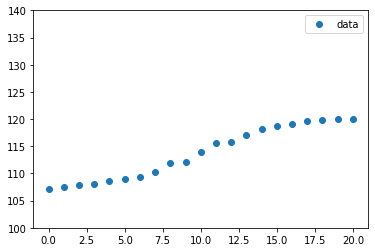

[  72.71019776 -122.42235069]


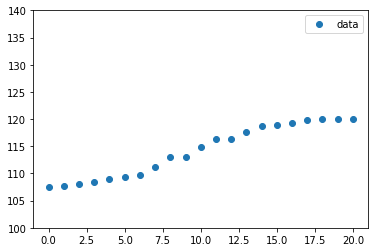

[  72.60373323 -122.508393  ]


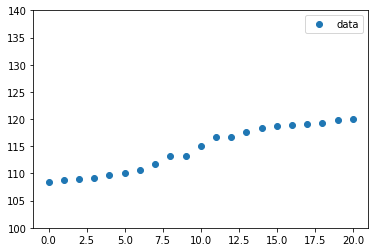

[  72.64557388 -122.47630794]


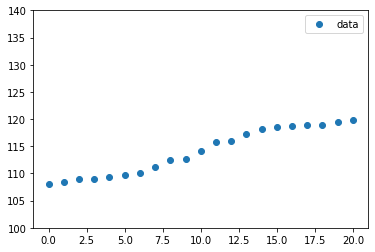

[  72.72232655 -122.40814019]


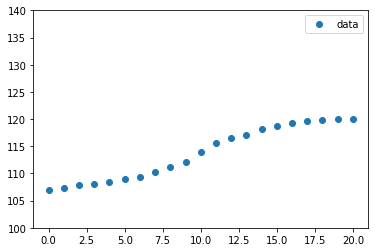

[  72.76479601 -122.38490433]


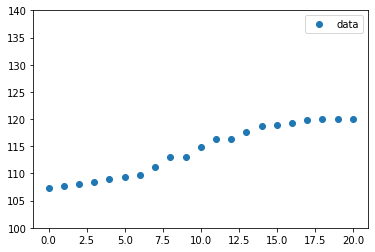

[  72.70412618 -122.43933216]


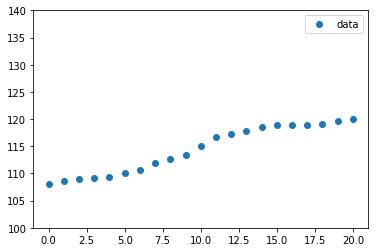

[  72.66731342 -122.46126265]


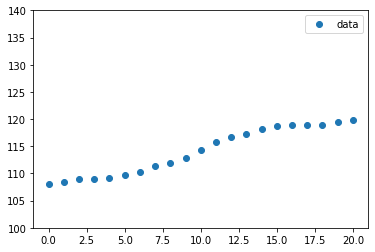

[  72.66932171 -122.44447421]


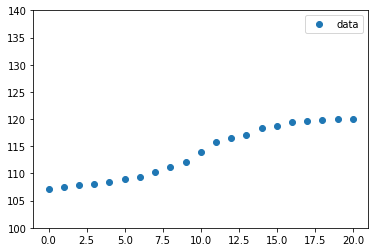

[  72.79270766 -122.36511015]


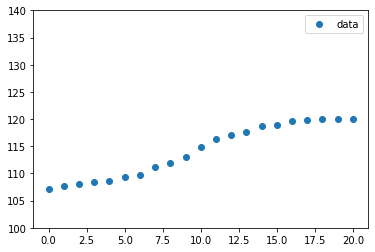

[  72.65794484 -122.47004124]


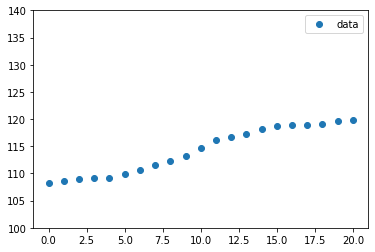

[  72.63699731 -122.48148595]


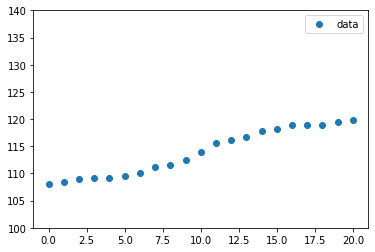

[  72.66380551 -122.45010048]


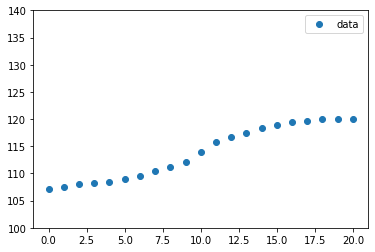

[  72.71796495 -122.41755697]


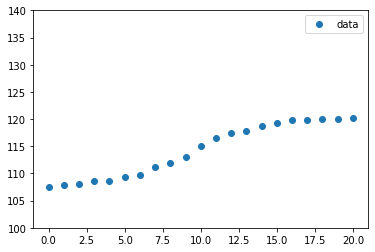

[  72.67717423 -122.45865718]


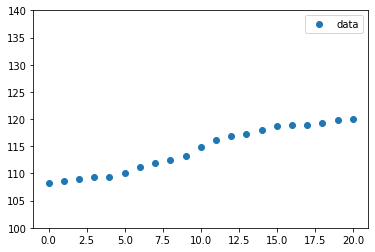

[  72.60972016 -122.5012035 ]


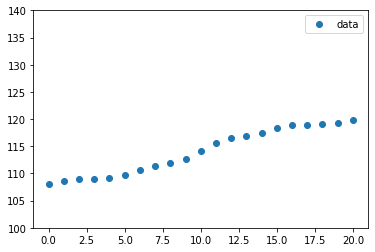

[  72.55295685 -122.52563068]


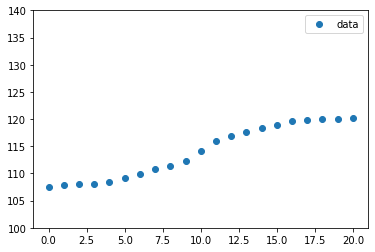

[  72.69229415 -122.43585705]


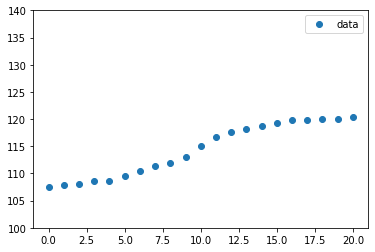

[  72.64030234 -122.48406609]


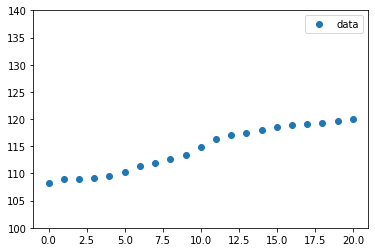

[  72.63814197 -122.48240838]


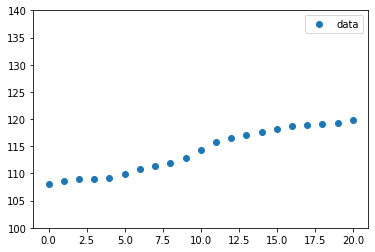

[  72.50878531 -122.5546625 ]


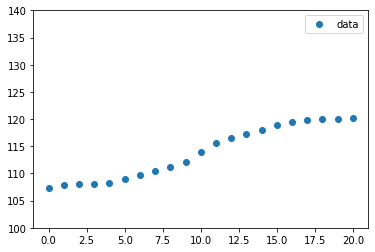

[  72.51889449 -122.55009036]


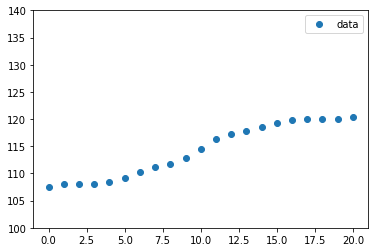

[  72.70558213 -122.4372097 ]


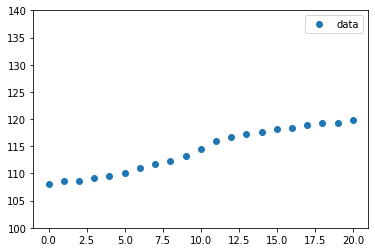

[  72.64219347 -122.47625455]


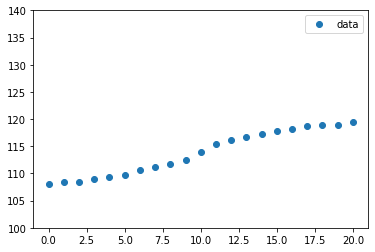

[  72.53748293 -122.53617516]


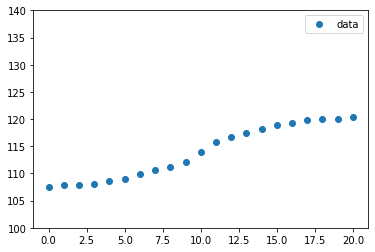

[  72.57234295 -122.51563284]


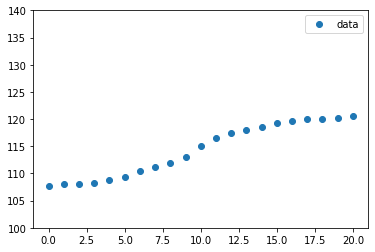

[  72.68394065 -122.45414023]


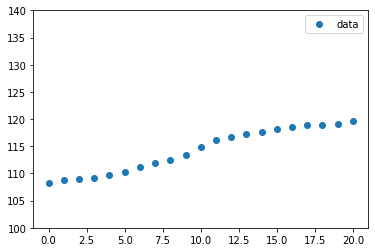

[  72.61838379 -122.49459576]


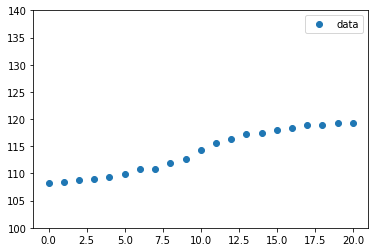

[  72.54650873 -122.53068932]


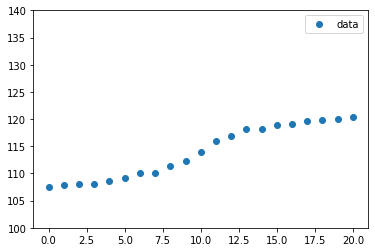

[  72.60186131 -122.49725056]


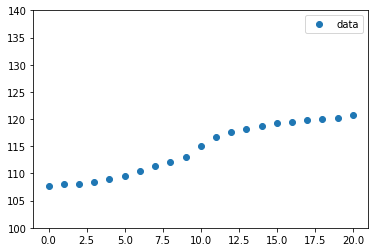

[  72.52368606 -122.56200498]


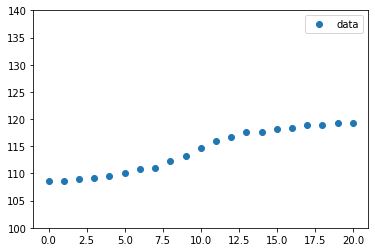

[  72.61405637 -122.49902699]


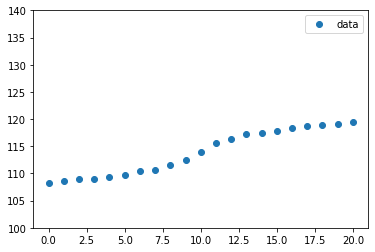

[  72.49203012 -122.56935936]


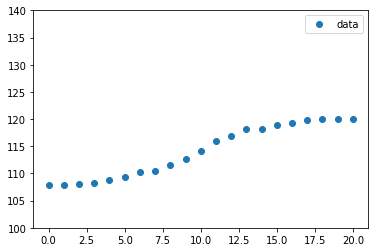

[  72.57142718 -122.51879879]


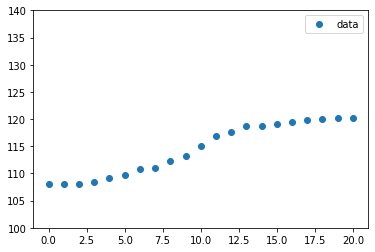

[  72.62029758 -122.49910518]


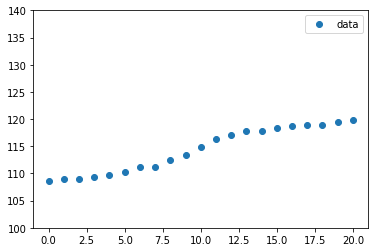

[  72.67110777 -122.46278321]


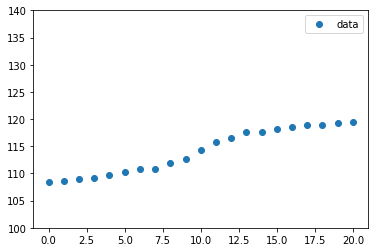

[  72.52866118 -122.54474494]


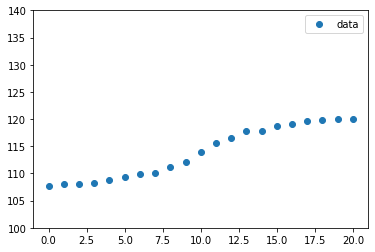

[  72.58918039 -122.50585844]


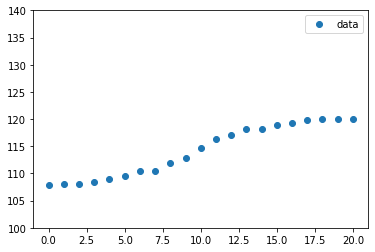

[  72.76349825 -122.40408692]


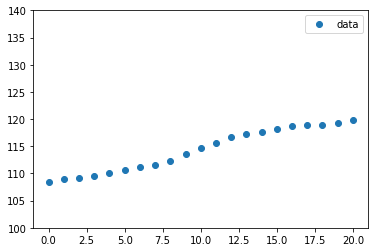

[  72.75492869 -122.40738788]


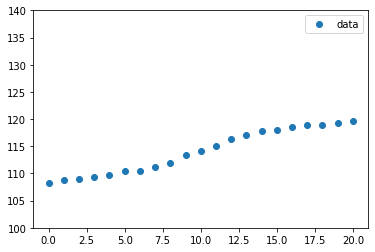

[  72.63873258 -122.47539108]


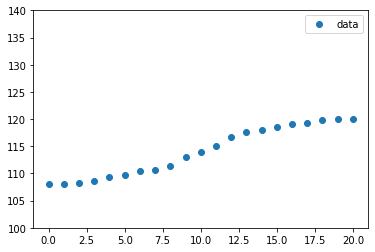

[  72.69659126 -122.43714914]


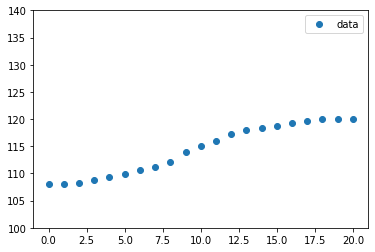

[  72.81550233 -122.3714997 ]


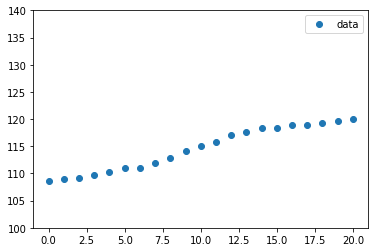

[  72.75532779 -122.4095389 ]


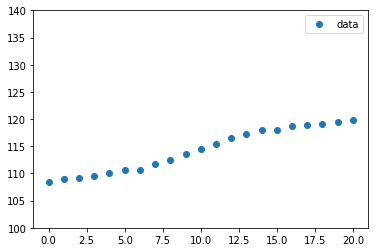

[  72.78899672 -122.37950775]


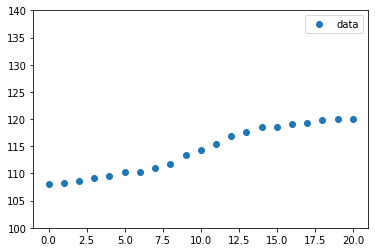

[  72.84583008 -122.34188852]


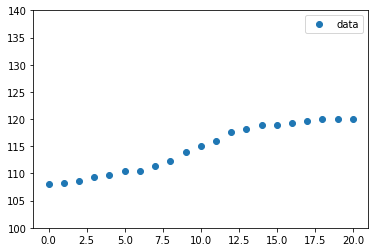

[  72.76603173 -122.40623715]


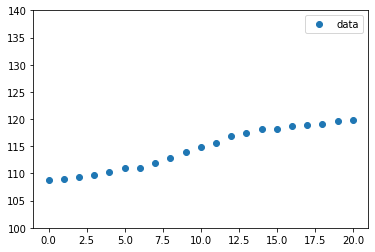

[  72.70045384 -122.44691334]


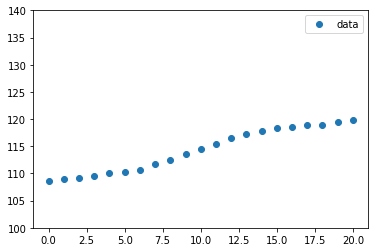

[  72.70392075 -122.44101957]


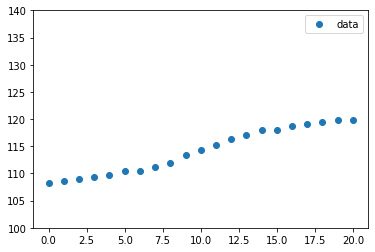

[  72.77084053 -122.39679277]


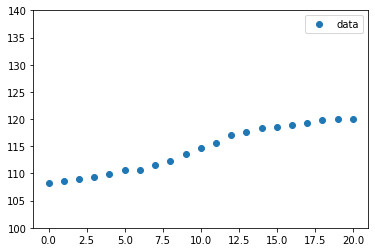

[  72.74870686 -122.41780298]


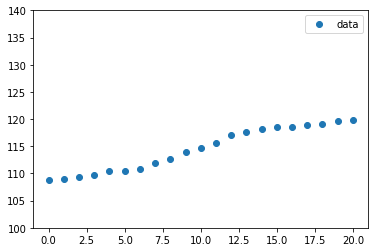

[  72.64072655 -122.48819076]


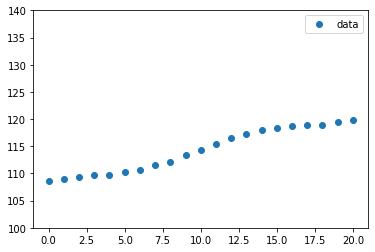

[  72.7444504  -122.41828228]


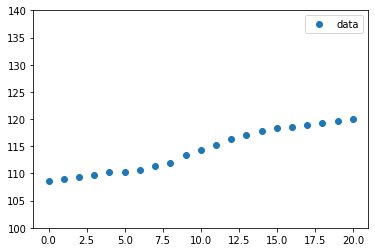

[  72.71339661 -122.44012192]


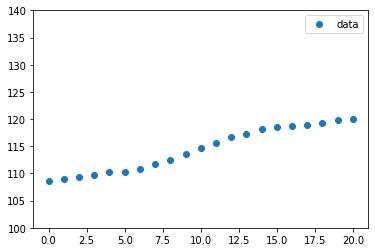

[  72.66594589 -122.47503765]


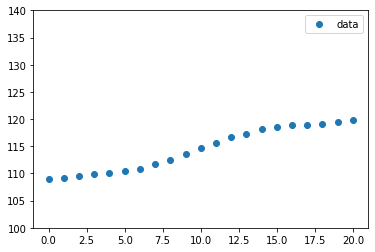

[  72.58573444 -122.5259703 ]


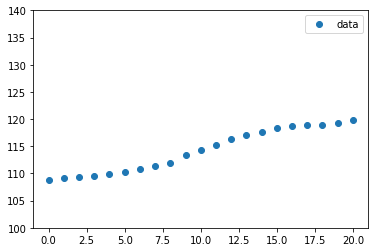

[  72.58527209 -122.52922847]


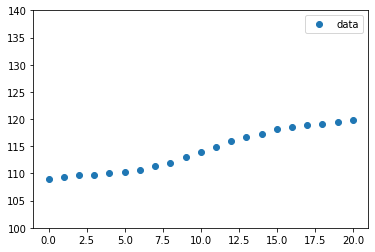

[  72.59380516 -122.52354021]


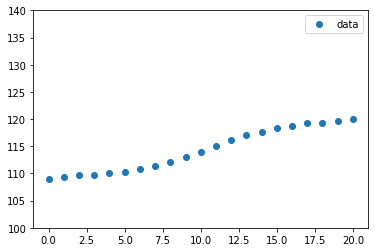

[  72.6902256  -122.45936839]


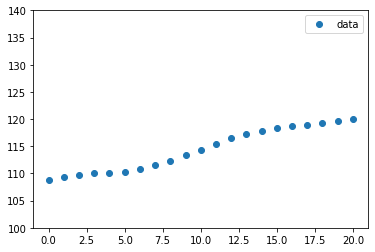

[  72.72422544 -122.43684117]


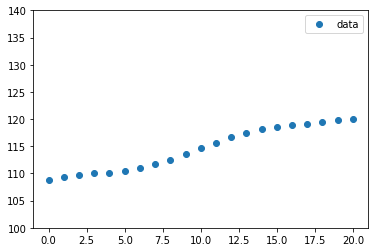

[  72.5821056  -122.53096633]


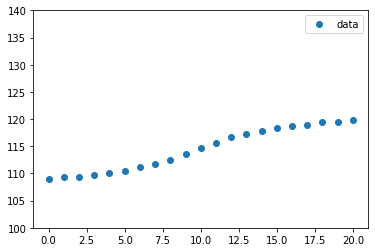

[  72.52856971 -122.56626252]


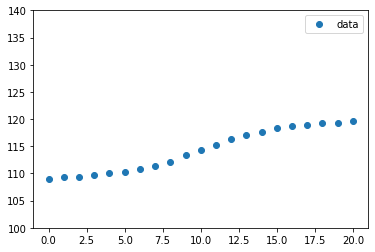

[  72.60895784 -122.50968116]


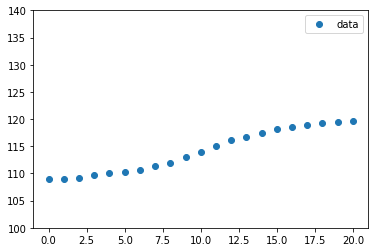

[  72.73101631 -122.42552389]


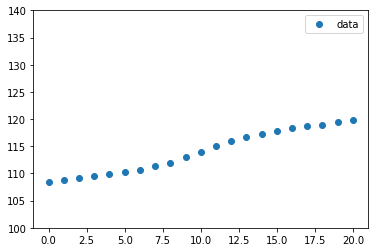

[  72.69270612 -122.4522316 ]


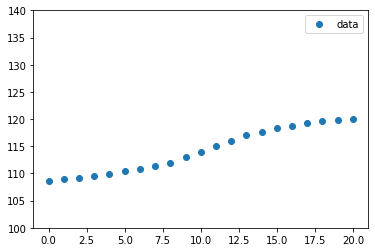

[  72.7141864  -122.43973829]


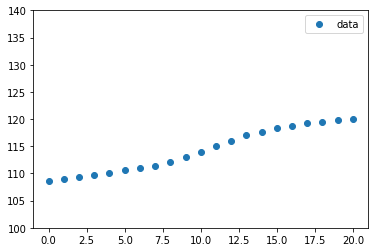

[  72.76746737 -122.40486737]


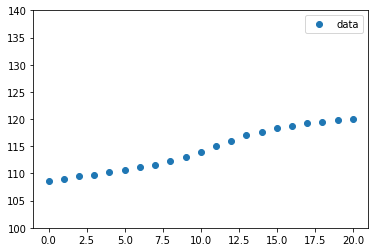

[  72.65893478 -122.4800417 ]


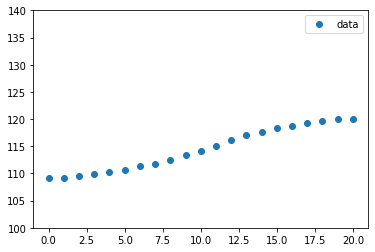

[  72.5916053  -122.52823619]


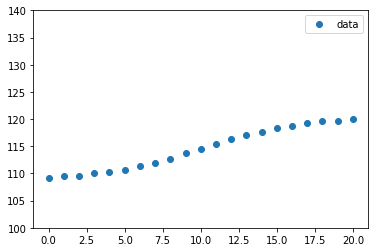

[  72.75534331 -122.41287474]


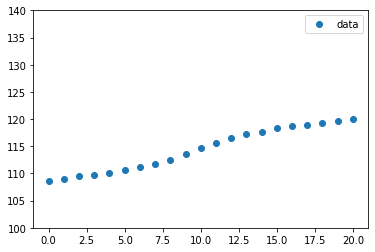

[  72.6903545  -122.45550694]


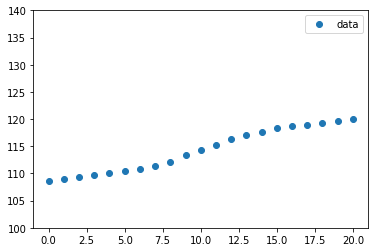

[  72.66651301 -122.47018788]


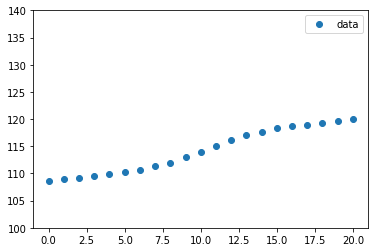

[  72.64064265 -122.48613891]


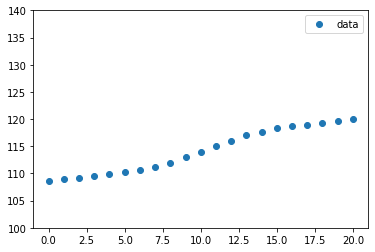

[  72.63794549 -122.48611386]


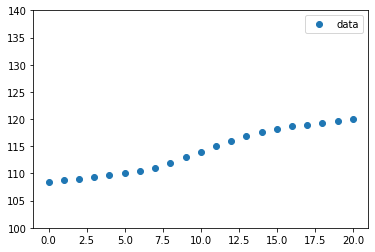

[  72.6349217  -122.48798326]


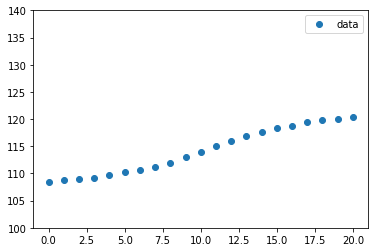

[  72.65477425 -122.47677771]


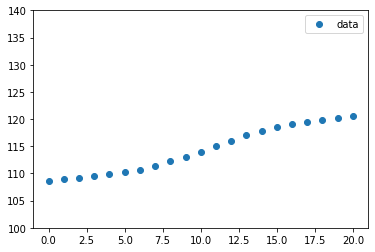

[  72.64455581 -122.48594112]


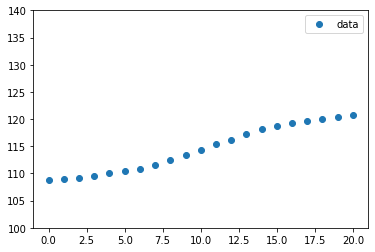

[  72.7067971 -122.4462912]


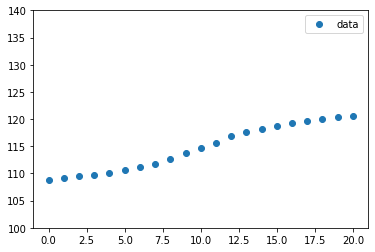

[  72.65740356 -122.47682537]


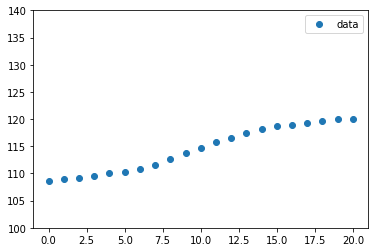

[  72.67413531 -122.46410661]


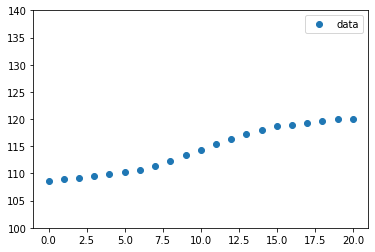

[  72.68121087 -122.45792629]


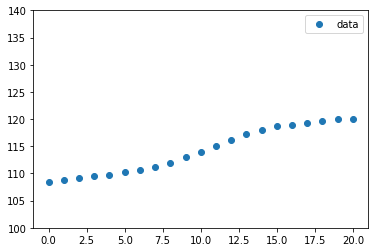

[  72.64138438 -122.4823859 ]


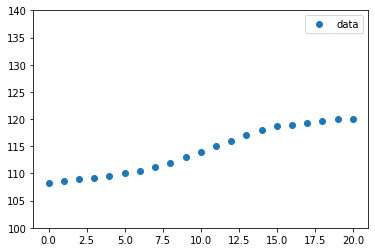

[  72.62375692 -122.49330174]


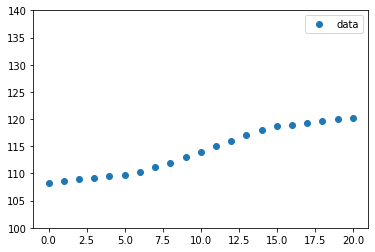

[  72.5921213  -122.51301403]


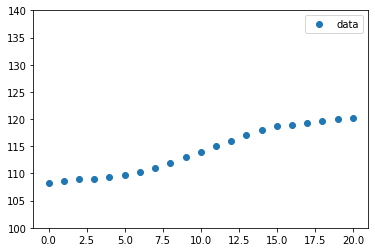

[  72.63782092 -122.48105605]


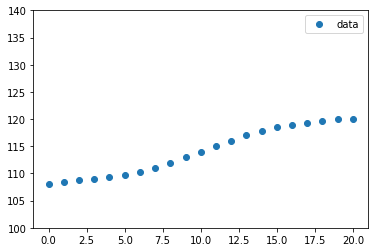

[  72.6596954  -122.46494216]


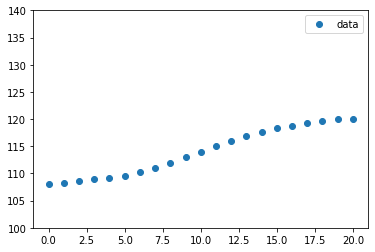

[  72.56098533 -122.53071277]


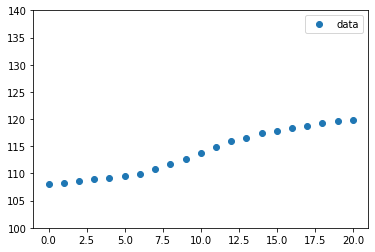

[  72.6417824  -122.47965878]


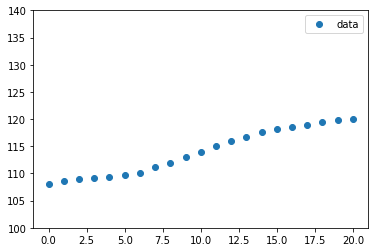

[  72.69556134 -122.44526095]


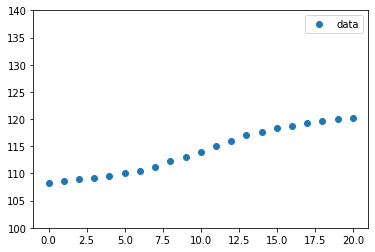

[  72.68314879 -122.45626381]


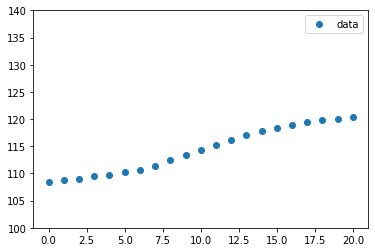

[  72.71824339 -122.43483548]


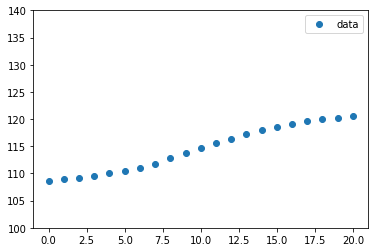

[  72.69915423 -122.44226102]


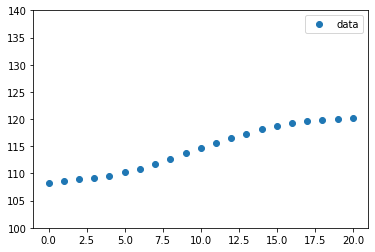

[  72.69242742 -122.44491836]


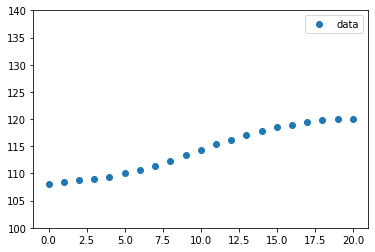

[  72.6719325  -122.45585849]


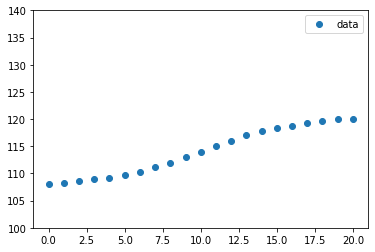

[  72.60490194 -122.50003198]


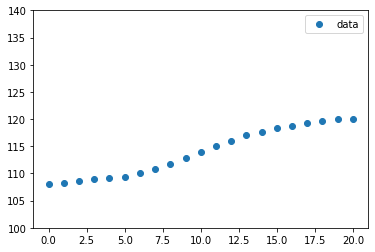

[  72.55595254 -122.53121914]


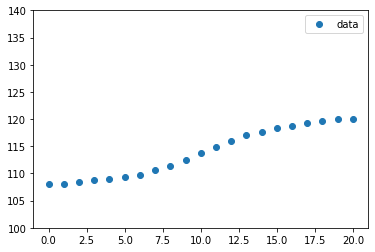

[  72.53274508 -122.54546875]


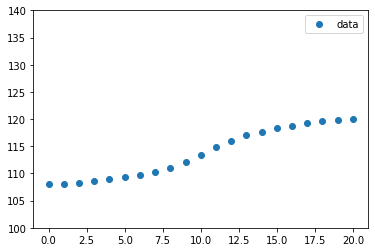

[  72.55058839 -122.53364985]


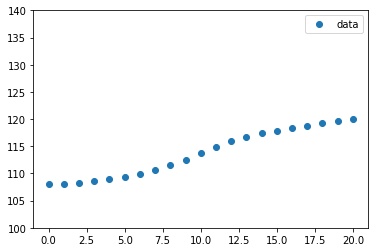

[  72.57221111 -122.51933202]


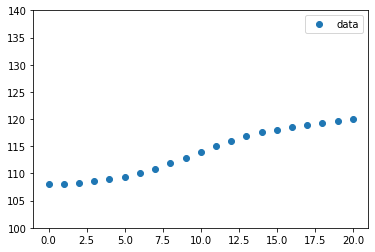

[  72.60762581 -122.49706159]


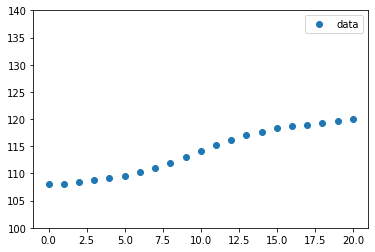

[  72.61031772 -122.498085  ]


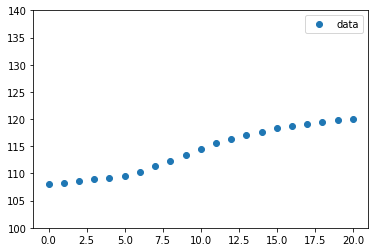

[  72.68186798 -122.45025664]


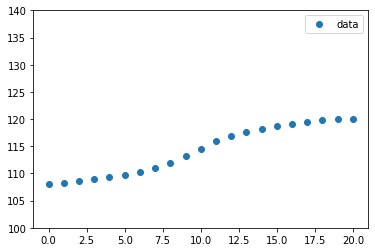

[  72.68129761 -122.45063654]


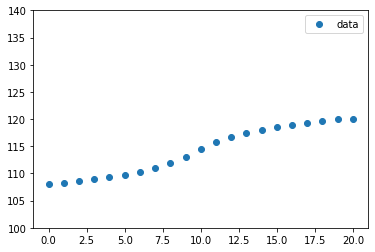

[  72.68039724 -122.45123785]


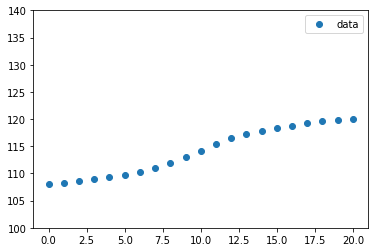

[  72.68001907 -122.45149177]


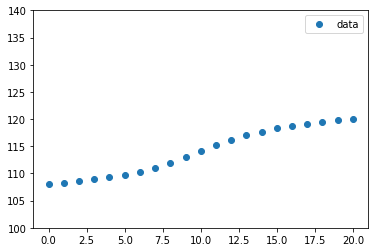

[  72.68045426 -122.45120436]


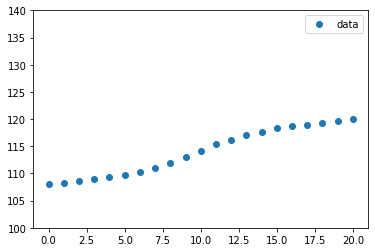

[  72.69744449 -122.43992528]


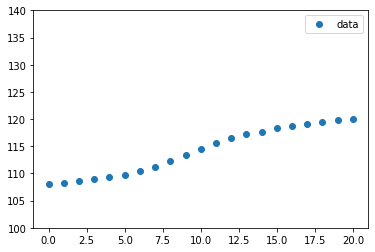

In [50]:
# os.chdir("/home/mj/HardDisk/Github/NTU/ARCS/img/X-Ray/Case_1/Cut")
os.chdir("/home/mj/Github/NTU/ARCS/img/X-Ray/Case_1/Cut")
file = "10_mean_80.bmp"
img = cv2.imread(file, 0)
blur, nlm, otsu, edge = image_processing(img)

edge_points = get_edge_points(edge)
cx,cy,r,_ = cf.least_squares_circle((edge_points))

sp_edge = get_subpixel_edge(np.asarray([cx,cy]), edge_points, nlm)

# cv2.imshow("Image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# print("{}, {}".format(cx, cy))